## Erschließungsstrategien für unbekannten Wortschatz von DaF-Lernenden an spanischen Universitäten (2017-19)
### MANOVA (und Faktorenanalyse)

In [238]:
MyData <- read.csv2(file="D:\\Daten\\DISS\\Daten\\Estrategias_Estudiantes_Analyse.csv", 
                    header=TRUE, sep=",", fileEncoding = "UTF-16")

In [239]:
#MyData[MyData == 0] <- NA

#### Likert-Variablen auswählen

Spalten, die Likert-Items enthalten, werden ausgewählt und in Vektoren zusammengefasst.

In [240]:
get_vec <- function(df,name){
    vec <- c()
    for (i in 1:ncol(df)){
        if (grepl(name, colnames(df)[i]) & !grepl("TEXT",colnames(df)[i]) ){
            vec <- c(vec, i)
        }
    }
    vec
}

In [241]:
vec_AQ2 <- get_vec(MyData,"A.Q2")
vec_AQ3 <- get_vec(MyData,"A.Q3")
vec_CQ1 <- get_vec(MyData,"C.Q1")

#### Funktion für Datenformat (Integer)

In [242]:
convert_data <- function(df,cols){
    X <- df[,cols]
    X <- do.call(cbind.data.frame,lapply(X,function(x) as.integer(as.character(x))))
    colnames(X) <- colnames(df)[cols]
    X
}

### Faktorenanalyse

In [243]:
library("psych")

In [244]:
FA_AQ2 <- fa(convert_data(MyData,vec_AQ2), nfactors = 3, rotate = "varimax")

In [245]:
FA_AQ3 <- fa(convert_data(MyData,vec_AQ3), nfactors = 6, rotate = "varimax")

In [246]:
FA_AQ3

Factor Analysis using method =  minres
Call: fa(r = convert_data(MyData, vec_AQ3), nfactors = 6, rotate = "varimax")
Standardized loadings (pattern matrix) based upon correlation matrix
          MR2   MR4   MR1   MR5   MR6   MR3    h2   u2 com
A.Q3_1  -0.02  0.08  0.07 -0.02 -0.04  0.51 0.277 0.72 1.1
A.Q3_2   0.11 -0.17  0.06  0.12  0.04  0.61 0.426 0.57 1.3
A.Q3_3  -0.04 -0.01  0.11  0.07  0.07  0.47 0.240 0.76 1.2
A.Q3_4  -0.01  0.10 -0.04  0.12  0.15  0.47 0.271 0.73 1.5
A.Q3_5   0.20  0.30  0.08  0.08  0.03  0.41 0.314 0.69 2.5
A.Q3_6   0.80  0.13  0.09  0.05 -0.05  0.09 0.682 0.32 1.1
A.Q3_7   0.79  0.19  0.12  0.13 -0.02  0.04 0.696 0.30 1.2
A.Q3_8   0.80  0.17  0.12  0.10  0.02 -0.04 0.700 0.30 1.2
A.Q3_9   0.54  0.16  0.06  0.16  0.10  0.05 0.361 0.64 1.5
A.Q3_28  0.22  0.18  0.15  0.40  0.08  0.11 0.282 0.72 2.7
A.Q3_10  0.40  0.49  0.03  0.17  0.09 -0.02 0.436 0.56 2.3
A.Q3_11  0.24  0.72  0.07  0.16  0.07  0.03 0.608 0.39 1.4
A.Q3_12  0.22  0.62  0.13  0.18  0.02  0.04 0.4

In [247]:
#write.csv2(FA_AQ3$weights, file ="D:\\Daten\\DISS\\Daten\\FA_weights.csv",row.names=TRUE)

Hypothese zum Ergebnis der explorativen Faktorenanalyse (AQ2):

* MR1: Kenntnisse des Deutschen nutzen (inkl. Kontext)
* MR2: Soziale Strategien
* MR3: Sprachkenntnisse nutzen (insbes. weitere Sprachen, Erstsprache)


Hypothese zum Ergebnis der explorativen Faktorenanalyse (AQ3):

* MR1: Kontextwissen (Textsorte, behandeltes Thema, kulturelles Wissen...)
* MR2: intralinguale Hinweise (Wortbildung, morphosyntaktische Regularitäten, Orthographie) + Konnektoren, Erklärungshilfen
* MR3: interlinguale Hinweise (inkl. Ethymologie)
* MR4: engerer Kontext, Analyse auf Satzebene (Syntax, semantische Relationen)
* MR5: metakognitive Strategien
* MR6: Bilder, Grafiken, Symbole, Zahlen, Kommunikationssituation


### MANOVA AQ2, AQ3

Matrix AQ2:

In [248]:
A2 = convert_data(MyData,vec_AQ2)
A2[is.na(A2)] <- 0 
A2 <- as.matrix(A2)

B2 = FA_AQ2$weights
B2 <- as.matrix(B2)

C2 <- A2 %*% B2

In [249]:
Df_total2 <- merge(MyData,C2,by=0, sort=FALSE)
Df_total2[Df_total2 == 0] <- NA
#Df_total2[is.na(Df_total2)] <- 0

Matrix AQ3:

In [250]:
A = convert_data(MyData,vec_AQ3)
A[is.na(A)] <- 0 
A <- as.matrix(A)

B = FA_AQ3$weights
B <- as.matrix(B)

C <- A %*% B

In [251]:
Df_total <- merge(MyData,C,by=0, sort=FALSE)
Df_total[Df_total == 0] <- NA
#Df_total[is.na(Df_total)] <- 0

Vektoren mit zu untersuchenden Variablen:

In [252]:
vec_V <- get_vec(Df_total,"V_")
vec_W <- get_vec(Df_total,"W_")

In [253]:
remove <- c(66,69)
vec_V[!vec_V %in% remove]

[1] 64 65 67 68 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90
[26] 91 92

Die Variable an Position 66 ("Niveau des aktuellen Deutschkurses") wird im Fall der Analyse getrennt nach Niveaustufen nicht berücksichtigt.

In [254]:
colnames(Df_total[,vec_V[!vec_V %in% remove]])

[1] "V_L1.Bi.Trilingualismus" "V_Studienrichtung"      
 [3] "V_Alter"                 "V_Geschlecht"           
 [5] "V_Spr_Zahl"              "V_Spr_Fran"             
 [7] "V_Spr_Griech"            "V_Spr_Latein"           
 [9] "V_Spr_Germ"              "V_Spr_Rom"              
[11] "V_Spr_Slaw"              "V_Spr_Asiat"            
[13] "V_E_Schule_LL"           "V_E_Schule_Eng"         
[15] "V_E_Schule_Spr"          "V_E_Univ_DK"            
[17] "V_E_Univ_andere"         "V_E_Sprachschule"       
[19] "V_E_DK_aktuell"          "V_E_Sozial"             
[21] "V_E_autonom"             "V_Met_Erkl"             
[23] "V_Met_Tipps"             "V_Met_Training"         
[25] "V_Met_Vgl"               "V_Met_Reflexion"        
[27] "V_Met_unbewusst"

In [255]:
for (v in vec_V){Df_total[,v] <- as.factor(Df_total[,v])}
for (v in vec_V){Df_total2[,v] <- as.factor(Df_total2[,v])}
for (v in vec_W){Df_total[,v] <- as.factor(Df_total[,v])}
for (v in vec_W){Df_total2[,v] <- as.factor(Df_total2[,v])}

In [256]:
#eje <- summary(manova(cbind(MR1,MR2,MR3,MR4,MR5,MR6) ~ V_Geschlecht, data = Df_total))

In [257]:
#for (i in vec_V){
#    print(summary(manova(cbind(MR1,MR2,MR3,MR4,MR5,MR6) ~ Df_total[,i], data = Df_total)))
#}

Funktionen zur Berechnung der MANOVA und t-Test:

In [258]:
MANOVA2_table <- function(df,vec){
    man_int <- summary(manova(cbind(MR1,MR2,MR3) ~ df[,vec[1]], data = df))
    RES_MAN2 <- as.data.frame(t(man_int$stats[1,]))
    for (i in vec[2:length(vec)]){
        man_int <- summary(manova(cbind(MR1,MR2,MR3) ~ df[,i], data = df))
        RES_MAN2 <- rbind(RES_MAN2,as.data.frame(t(man_int$stats[1,]))) 
    }
    rownames(RES_MAN2) <- colnames(df)[vec]
    RES_MAN2
}

In [259]:
#MANOVA2a_table <- function(df,vec){
 #   man_int <- summary(manova(cbind(A.Q2_1,A.Q2_2,A.Q2_3,A.Q2_4,A.Q2_5,A.Q2_6,A.Q2_7) ~ df[,vec[1]], data = df))
  #  RES_MAN2 <- as.data.frame(t(man_int$stats[1,]))
   # for (i in vec[2:length(vec)]){
    #    man_int <- summary(manova(cbind(A.Q2_1,A.Q2_2,A.Q2_3,A.Q2_4,A.Q2_5,A.Q2_6,A.Q2_7) ~ df[,i], data = df))
     #   RES_MAN2 <- rbind(RES_MAN2,as.data.frame(t(man_int$stats[1,]))) 
    #}
    #rownames(RES_MAN2) <- colnames(df)[vec]
    #RES_MAN2
#}

In [260]:
MANOVA3_table <- function(df,vec){
    man_int <- summary(manova(cbind(MR1,MR2,MR3,MR4,MR5,MR6) ~ df[,vec[1]], data = df))
    RES_MAN3 <- as.data.frame(t(man_int$stats[1,]))
    for (i in vec[2:length(vec)]){
        man_int <- summary(manova(cbind(MR1,MR2,MR3,MR4,MR5,MR6) ~ df[,i], data = df))
        RES_MAN3 <- rbind(RES_MAN3,as.data.frame(t(man_int$stats[1,]))) 
    }
    rownames(RES_MAN3) <- colnames(df)[vec]
    RES_MAN3
}

In [261]:
tabletstbonf2 <- function(data ,v ,facts=c("MR1","MR2","MR3")){
datalist = list()
    for (i in 1:length(v)){
    pv <- c()
        for (fact in facts){
            test <- pairwise.t.test(data[,fact],data[,v[i]], p.adj = "bonf")
            pv <- c(pv,test$p.value[1,])
                            }
    datalist[[i]] <- pv
        }
    R <- do.call(rbind,datalist)
    colnames(R) <- facts
    rownames(R) <- v
    R
    }

In [262]:
tabletstbonf <- function(data ,v ,facts=c("MR1","MR2","MR3","MR4","MR5","MR6")){
datalist = list()
    for (i in 1:length(v)){
    pv <- c()
        for (fact in facts){
            test <- pairwise.t.test(data[,fact],data[,v[i]], p.adj = "bonf")
            pv <- c(pv,test$p.value[1,])
                            }
    datalist[[i]] <- pv
        }
    R <- do.call(rbind,datalist)
    colnames(R) <- facts
    rownames(R) <- v
    R
    }

In [390]:
tabletstbonf_S <- function(data ,v ,facts=c("A.Q4_Score","MR6")){
datalist = list()
    for (i in 1:length(v)){
    pv <- c()
        for (fact in facts){
            test <- pairwise.t.test(data[,fact],data[,v[i]], p.adj = "bonf")
            pv <- c(pv,test$p.value[1,])
                            }
    datalist[[i]] <- pv
        }
    R <- do.call(rbind,datalist)
    colnames(R) <- facts
    rownames(R) <- v
    R
    }

In [393]:
tabletstbonf_S(Df_total,c('V_E_Univ_DK',
 'V_E_DK_aktuell',
 'V_E_Sozial',
 'V_Met_Vgl'))

,A.Q4_Score,MR6
V_E_Univ_DK,0.0057918584,0.77131639
V_E_DK_aktuell,0.0061989991,0.05081227
V_E_Sozial,0.0007123865,0.31314020
V_Met_Vgl,0.0043048503,0.48424027


### AQ2

MANOVA (gesamt):

In [263]:
res_manova2 <- MANOVA2_table(Df_total2,vec_V)
res2 <- res_manova2[res_manova2['Pr(>F)'] < 0.05,]
res2

,Df,Pillai,approx F,num Df,den Df,Pr(>F)
V_Studienrichtung,3,0.05417532,2.176215,9,1065,2.146826e-02
V_Niveau_DK,4,0.21917573,7.586119,12,1155,1.202444e-13
V_Alter,3,0.06517185,2.775795,9,1125,3.217871e-03
V_Spr_Germ,1,0.03281690,4.365710,3,386,4.865961e-03
V_E_Schule_Eng,1,0.02372938,3.127391,3,386,2.576800e-02
V_E_Schule_Spr,1,0.02679201,3.542140,3,386,1.478592e-02
V_E_Univ_DK,1,0.05913717,8.087239,3,386,3.086102e-05
V_E_Univ_andere,1,0.04878842,6.599418,3,386,2.333991e-04
V_E_Sprachschule,1,0.02562264,3.383474,3,386,1.829447e-02
V_E_DK_aktuell,1,0.03435261,4.577277,3,386,3.652933e-03


In [264]:
write.csv2(res2, file ="D:\\Daten\\DISS\\Daten\\Resmanova2.csv",row.names=TRUE)

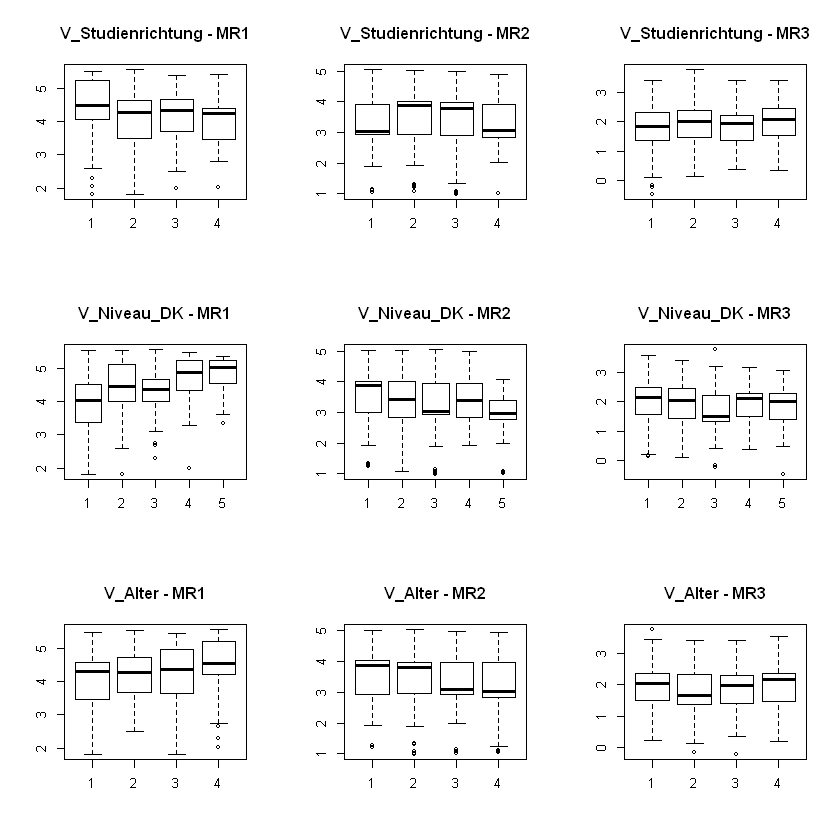

In [265]:
par(mfrow=c(3,3))
boxplot(MR1~V_Studienrichtung, data = Df_total2, main = 'V_Studienrichtung - MR1')
boxplot(MR2~V_Studienrichtung, data = Df_total2, main = 'V_Studienrichtung - MR2')
boxplot(MR3~V_Studienrichtung, data = Df_total2, main = 'V_Studienrichtung - MR3')
boxplot(MR1~V_Niveau_DK, data = Df_total2, main = 'V_Niveau_DK - MR1')
boxplot(MR2~V_Niveau_DK, data = Df_total2, main = 'V_Niveau_DK - MR2')
boxplot(MR3~V_Niveau_DK, data = Df_total2, main = 'V_Niveau_DK - MR3')
boxplot(MR1~V_Alter, data = Df_total2, main = 'V_Alter - MR1')
boxplot(MR2~V_Alter, data = Df_total2, main = 'V_Alter - MR2')
boxplot(MR3~V_Alter, data = Df_total2, main = 'V_Alter - MR3')

In [266]:
summary(Df_total2[which(Df_total2$V_Niveau_DK=='1'),][c('MR1','MR2','MR3')])

      MR1             MR2             MR3        
 Min.   :1.816   Min.   :1.251   Min.   :0.1384  
 1st Qu.:3.389   1st Qu.:3.007   1st Qu.:1.5656  
 Median :4.020   Median :3.877   Median :2.1265  
 Mean   :3.953   Mean   :3.566   Mean   :2.0771  
 3rd Qu.:4.496   3rd Qu.:4.030   3rd Qu.:2.4651  
 Max.   :5.527   Max.   :5.014   Max.   :3.5514  

In [267]:
xy <- data.frame(do.call(rbind,lapply(Df_total2[which(Df_total2$V_Niveau_DK=='1'),][c('MR1','MR2','MR3')],summary)))

In [268]:
xy1 <- data.frame(do.call(rbind,lapply(Df_total2[which(Df_total2$V_Niveau_DK=='1'),][c('MR1','MR2','MR3')],sd)))

In [269]:
merge(xy,xy1,by=0, sort=FALSE)

Row.names,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.,do.call.rbind..lapply.Df_total2.which.Df_total2.V_Niveau_DK....
MR1,1.8161166,3.388757,4.020028,3.953159,4.495689,5.527126,0.8527704
MR2,1.2506026,3.007080,3.876856,3.566382,4.029622,5.013733,0.9030280
MR3,0.1383936,1.565576,2.126515,2.077082,2.465055,3.551351,0.7225721


In [270]:
apply(Df_total2[which(Df_total2$V_Niveau_DK=='1'),][c('MR1','MR2','MR3')], 2, mean, na.rm = TRUE)
apply(Df_total2[which(Df_total2$V_Niveau_DK=='1'),][c('MR1','MR2','MR3')], 2, sd, na.rm = TRUE)

MR1      MR2      MR3 
3.953159 3.566382 2.077082

MR1       MR2       MR3 
0.8527704 0.9030280 0.7225721

In [271]:
describe(Df_total2[which(Df_total2$V_Niveau_DK=='1'),][c('MR1','MR2','MR3')])

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
MR1,1,152,3.953159,0.8527704,4.020028,3.966028,0.8348545,1.8161166,5.527126,3.711009,-0.1490256,-0.62298407,0.06916881
MR2,2,152,3.566382,0.9030280,3.876856,3.612316,1.2016209,1.2506026,5.013733,3.763131,-0.4228913,-0.34491601,0.07324524
MR3,3,152,2.077082,0.7225721,2.126515,2.077977,0.7207968,0.1383936,3.551351,3.412957,-0.1212863,-0.06292321,0.05860834


In [272]:
#res_manova2a <- MANOVA2a_table(Df_total2,vec_V)
#res_manova2a[res_manova2a['Pr(>F)'] < 0.05,]

t-Test (gesamt):

In [273]:
#rownames(res_manova2[res_manova2['Pr(>F)'] < 0.05,])

In [274]:
ttest_A2 <- tabletstbonf2(Df_total2,c('V_Spr_Germ',
 'V_E_Schule_Eng',
 'V_E_Schule_Spr',
 'V_E_Univ_DK',
 'V_E_Univ_andere',
 'V_E_Sprachschule',
 'V_E_DK_aktuell',
 'V_E_Sozial',
 'V_E_autonom',
 'V_Met_Training',
 'V_Met_Reflexion',
 'V_Met_unbewusst'
 ))
ttest_A2

,MR1,MR2,MR3
V_Spr_Germ,1.732609e-03,0.561229033,0.06769899
V_E_Schule_Eng,3.133540e-01,0.004123614,0.97301593
V_E_Schule_Spr,1.558504e-02,0.033503904,0.80728404
V_E_Univ_DK,1.077163e-05,0.318273822,0.15826296
V_E_Univ_andere,1.337741e-05,0.529285123,0.60048378
V_E_Sprachschule,1.863001e-02,0.036066435,0.86796622
V_E_DK_aktuell,3.266436e-02,0.004337802,0.39612632
V_E_Sozial,4.590967e-03,0.781065313,0.93771497
V_E_autonom,3.278314e-02,0.342625921,0.02978431
V_Met_Training,9.900044e-03,0.026773870,0.81535457


In [275]:
write.csv2(ttest_A2, file ="D:\\Daten\\DISS\\Daten\\Ttest_A2.csv",row.names=TRUE)

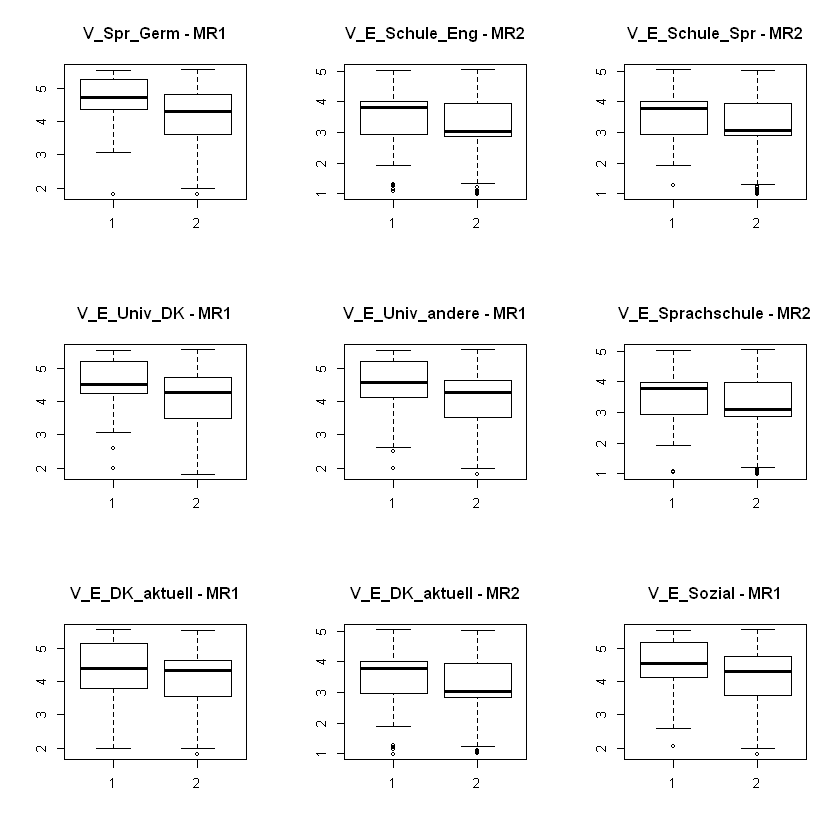

In [276]:
par(mfrow=c(3,3))
boxplot(MR1~V_Spr_Germ, data = Df_total2, main = 'V_Spr_Germ - MR1')
boxplot(MR2~V_E_Schule_Eng, data = Df_total2, main = 'V_E_Schule_Eng - MR2')
boxplot(MR2~V_E_Schule_Spr, data = Df_total2, main = 'V_E_Schule_Spr - MR2')
boxplot(MR1~V_E_Univ_DK, data = Df_total2, main = 'V_E_Univ_DK - MR1')
boxplot(MR1~V_E_Univ_andere, data = Df_total2, main = 'V_E_Univ_andere - MR1')
boxplot(MR2~V_E_Sprachschule, data = Df_total2, main = 'V_E_Sprachschule - MR2')
boxplot(MR1~V_E_DK_aktuell, data = Df_total2, main = 'V_E_DK_aktuell - MR1')
boxplot(MR2~V_E_DK_aktuell, data = Df_total2, main = 'V_E_DK_aktuell - MR2')
boxplot(MR1~V_E_Sozial, data = Df_total2, main = 'V_E_Sozial - MR1')

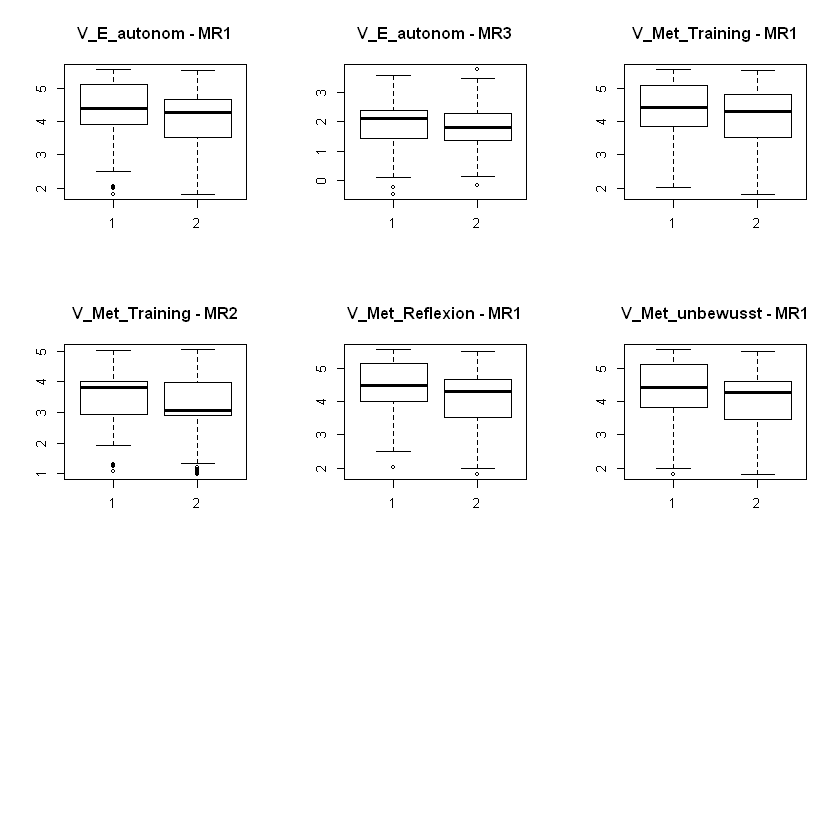

In [277]:
par(mfrow=c(3,3))
boxplot(MR1~V_E_autonom, data = Df_total2, main = 'V_E_autonom - MR1')
boxplot(MR3~V_E_autonom, data = Df_total2, main = 'V_E_autonom - MR3')
boxplot(MR1~V_Met_Training, data = Df_total2, main = 'V_Met_Training - MR1')
boxplot(MR2~V_Met_Training, data = Df_total2, main = 'V_Met_Training - MR2')
boxplot(MR1~V_Met_Reflexion, data = Df_total2, main = 'V_Met_Reflexion - MR1')
boxplot(MR1~V_Met_unbewusst, data = Df_total2, main = 'V_Met_unbewusst - MR1')

In [278]:
summary(Df_total2[,vec_V])

 V_L1.Bi.Trilingualismus V_Studienrichtung V_Niveau_DK V_Alter    V_Geschlecht
 1:103                   1   :131          1:152       1   :104   1   :287    
 2:287                   2   :129          2: 66       2   : 84   2   : 91    
                         3   : 70          3:103       3   : 99   NA's: 12    
                         4   : 29          4: 34       4   : 92               
                         NA's: 31          5: 35       NA's: 11               
 V_Erstsprache_Span V_Spr_Zahl V_Spr_Fran V_Spr_Griech V_Spr_Latein V_Spr_Germ
 1:363              1: 34      1:271      1:110        1:187        1: 37     
 2: 27              3: 85      2:119      2:280        2:203        2:353     
                    4:115                                                     
                    5:156                                                     
                                                                              
 V_Spr_Rom V_Spr_Slaw V_Spr_Asiat V_E_Schule_LL V_E_

MANOVA (A1):

In [279]:
res_anova2A <- MANOVA2_table(Df_total2[which(Df_total2$V_Niveau_DK=='1'),],vec_V[!vec_V %in% remove])
res_anova2A[res_anova2A['Pr(>F)'] < 0.05,]

,Df,Pillai,approx F,num Df,den Df,Pr(>F)
V_E_Univ_DK,1,0.07099764,3.770228,3,148,0.01207812
V_E_DK_aktuell,1,0.06083667,3.195691,3,148,0.02531988
V_E_Sozial,1,0.05725683,2.996224,3,148,0.03272407


In [280]:
tabletstbonf2(Df_total2[which(Df_total2$V_Niveau_DK=='1'),],c('V_E_Univ_DK',
 'V_E_DK_aktuell',
 'V_E_Sozial',
 'V_Met_Vgl'
 ))

,MR1,MR2,MR3
V_E_Univ_DK,0.003763959,0.34908579,0.55029423
V_E_DK_aktuell,0.353158876,0.01632941,0.27647379
V_E_Sozial,0.064430965,0.86498322,0.01339737
V_Met_Vgl,0.377536090,0.01404968,0.74410003


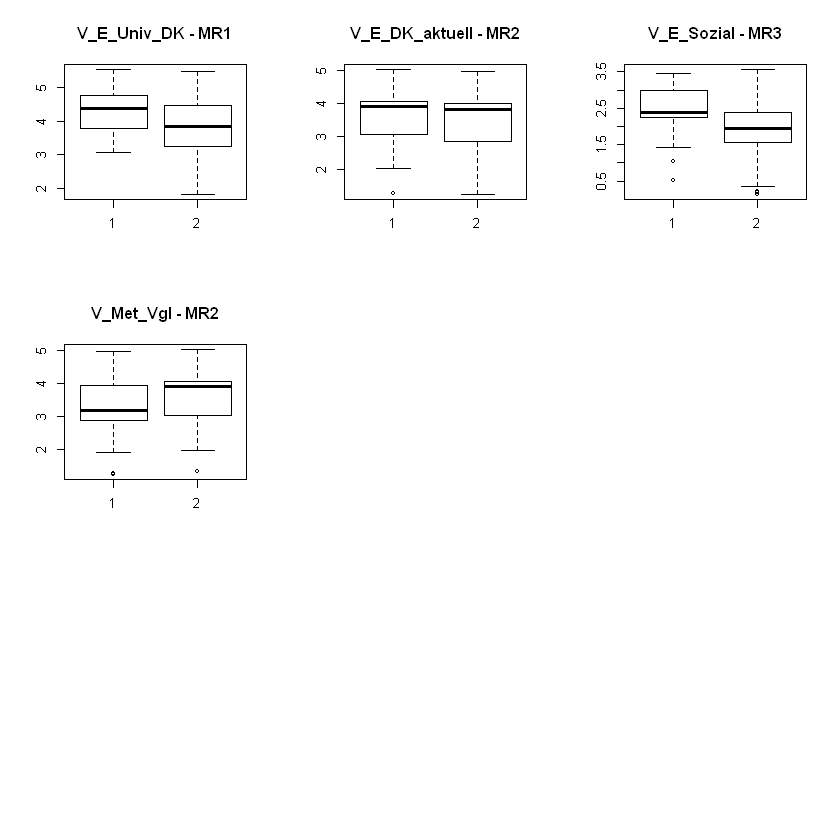

In [281]:
par(mfrow=c(3,3))
boxplot(MR1~V_E_Univ_DK, data = Df_total2[which(Df_total2$V_Niveau_DK=='1'),], main = 'V_E_Univ_DK - MR1')
boxplot(MR2~V_E_DK_aktuell, data = Df_total2[which(Df_total2$V_Niveau_DK=='1'),], main = 'V_E_DK_aktuell - MR2')
boxplot(MR3~V_E_Sozial, data = Df_total2[which(Df_total2$V_Niveau_DK=='1'),], main = 'V_E_Sozial - MR3')
boxplot(MR2~V_Met_Vgl, data = Df_total2[which(Df_total2$V_Niveau_DK=='1'),], main = 'V_Met_Vgl - MR2')

In [282]:
summary(Df_total2[which(Df_total2$V_Niveau_DK=='1'),vec_V[!vec_V %in% remove]])

 V_L1.Bi.Trilingualismus V_Studienrichtung V_Alter   V_Geschlecht V_Spr_Zahl
 1: 39                   1   :20           1   :79   1   :118     1:14      
 2:113                   2   :81           2   :37   2   : 32     3:36      
                         3   :26           3   :21   NA's:  2     4:46      
                         4   :19           4   :14                5:56      
                         NA's: 6           NA's: 1                          
 V_Spr_Fran V_Spr_Griech V_Spr_Latein V_Spr_Germ V_Spr_Rom V_Spr_Slaw
 1:109      1: 45        1:70         1:  6      1: 40     1: 16     
 2: 43      2:107        2:82         2:146      2:112     2:136     
                                                                     
                                                                     
                                                                     
 V_Spr_Asiat V_E_Schule_LL V_E_Schule_Eng V_E_Schule_Spr V_E_Univ_DK
 1: 16       1:64          1:102          1:72   

MANOVA (A2):

In [283]:
res_anova2A <- MANOVA2_table(Df_total2[which(Df_total2$V_Niveau_DK=='2'),],vec_V[!vec_V %in% remove])
res_anova2A[res_anova2A['Pr(>F)'] < 0.05,]

,Df,Pillai,approx F,num Df,den Df,Pr(>F)
V_E_Schule_Eng,1,0.1615030,3.980610,3,62,0.01168733
V_Met_Erkl,1,0.1442747,3.484385,3,62,0.02094564


In [284]:
tabletstbonf2(Df_total2[which(Df_total2$V_Niveau_DK=='2'),],c('V_E_Schule_Eng','V_Met_Erkl'))

,MR1,MR2,MR3
V_E_Schule_Eng,0.003035794,0.12148156,0.7454012
V_Met_Erkl,0.057799951,0.01681794,0.6260147


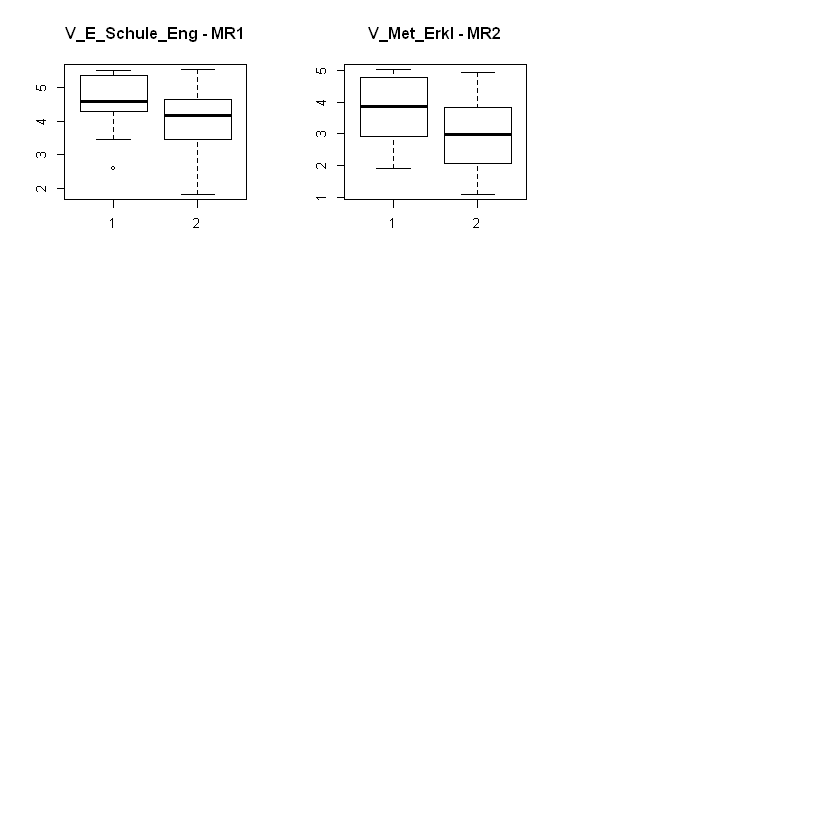

In [285]:
par(mfrow=c(3,3))
boxplot(MR1~V_E_Schule_Eng, data = Df_total2[which(Df_total2$V_Niveau_DK=='2'),], main = 'V_E_Schule_Eng - MR1')
boxplot(MR2~V_Met_Erkl, data = Df_total2[which(Df_total2$V_Niveau_DK=='2'),], main = 'V_Met_Erkl - MR2')

In [286]:
summary(Df_total2[which(Df_total2$V_Niveau_DK=='2'),vec_V[!vec_V %in% remove]])

 V_L1.Bi.Trilingualismus V_Studienrichtung V_Alter   V_Geschlecht V_Spr_Zahl
 1:20                    1   :28           1   :19   1   :39      1: 8      
 2:46                    2   :23           2   :15   2   :21      3:13      
                         3   : 7           3   :10   NA's: 6      4:19      
                         4   : 5           4   :20                5:26      
                         NA's: 3           NA's: 2                          
 V_Spr_Fran V_Spr_Griech V_Spr_Latein V_Spr_Germ V_Spr_Rom V_Spr_Slaw
 1:37       1:18         1:31         1:10       1:26      1: 3      
 2:29       2:48         2:35         2:56       2:40      2:63      
                                                                     
                                                                     
                                                                     
 V_Spr_Asiat V_E_Schule_LL V_E_Schule_Eng V_E_Schule_Spr V_E_Univ_DK
 1: 8        1:23          1:40           1:29   

MANOVA (B1):

In [287]:
res_anova2A <- MANOVA2_table(Df_total2[which(Df_total2$V_Niveau_DK=='3'),],vec_V[!vec_V %in% remove])
res_anova2A[res_anova2A['Pr(>F)'] < 0.05,]

,Df,Pillai,approx F,num Df,den Df,Pr(>F)
V_Spr_Germ,1,0.10552389,3.893104,3,99,0.011222084
V_E_Schule_Spr,1,0.11748869,4.393289,3,99,0.006032423
V_E_DK_aktuell,1,0.15013766,5.829818,3,99,0.001038973
V_Met_unbewusst,1,0.08631338,3.117416,3,99,0.029543217


In [288]:
tabletstbonf2(Df_total2[which(Df_total2$V_Niveau_DK=='3'),],c('V_Spr_Germ',
 'V_E_Schule_Spr',                                                             
 'V_E_DK_aktuell',
 'V_Met_unbewusst'
 ))

,MR1,MR2,MR3
V_Spr_Germ,0.7340752194,0.0325437164,0.007535634
V_E_Schule_Spr,0.2064510977,0.0009323736,0.760006150
V_E_DK_aktuell,0.0002094006,0.0648808647,0.442166581
V_Met_unbewusst,0.0050459571,0.4698587561,0.158121289


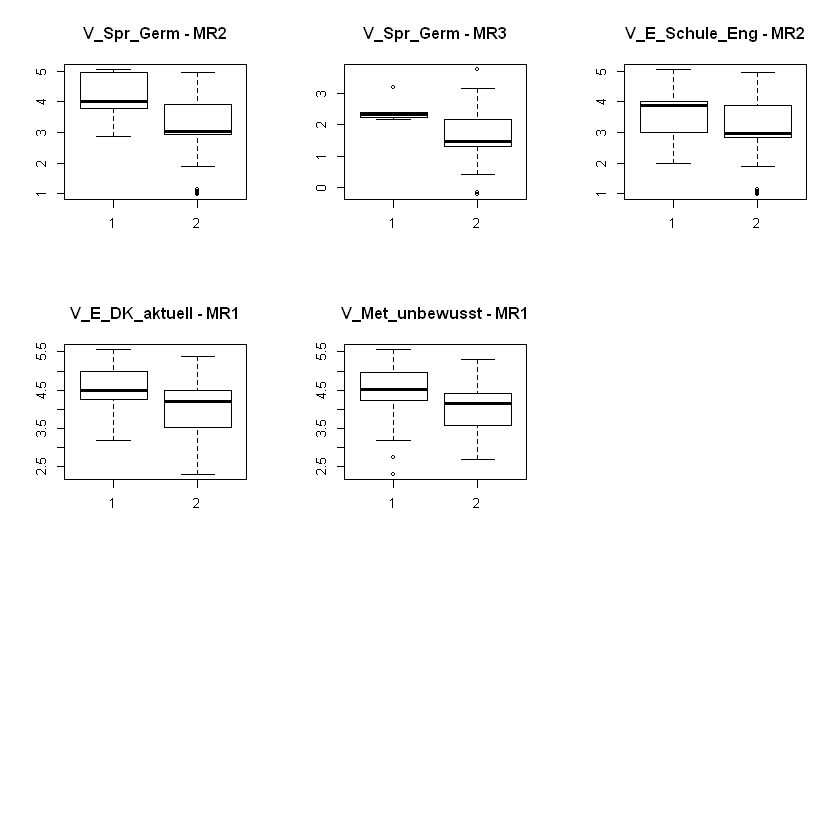

In [289]:
par(mfrow=c(3,3))
boxplot(MR2~V_Spr_Germ, data = Df_total2[which(Df_total2$V_Niveau_DK=='3'),], main = 'V_Spr_Germ - MR2')
boxplot(MR3~V_Spr_Germ, data = Df_total2[which(Df_total2$V_Niveau_DK=='3'),], main = 'V_Spr_Germ - MR3')
boxplot(MR2~V_E_Schule_Spr, data = Df_total2[which(Df_total2$V_Niveau_DK=='3'),], main = 'V_E_Schule_Eng - MR2')
boxplot(MR1~V_E_DK_aktuell, data = Df_total2[which(Df_total2$V_Niveau_DK=='3'),], main = 'V_E_DK_aktuell - MR1')
boxplot(MR1~V_Met_unbewusst, data = Df_total2[which(Df_total2$V_Niveau_DK=='3'),], main = 'V_Met_unbewusst - MR1')

In [290]:
summary(Df_total2[which(Df_total2$V_Niveau_DK=='3'),vec_V[!vec_V %in% remove]])

 V_L1.Bi.Trilingualismus V_Studienrichtung V_Alter   V_Geschlecht V_Spr_Zahl
 1:28                    1   :52           1   : 4   1   :77      1: 9      
 2:75                    2   :20           2   :31   2   :25      3:23      
                         3   :20           3   :39   NA's: 1      4:33      
                         4   : 4           4   :25                5:38      
                         NA's: 7           NA's: 4                          
 V_Spr_Fran V_Spr_Griech V_Spr_Latein V_Spr_Germ V_Spr_Rom V_Spr_Slaw
 1:73       1:28         1:53         1: 6       1:37      1: 5      
 2:30       2:75         2:50         2:97       2:66      2:98      
                                                                     
                                                                     
                                                                     
 V_Spr_Asiat V_E_Schule_LL V_E_Schule_Eng V_E_Schule_Spr V_E_Univ_DK
 1:12        1:30          1:49           1:43   

MANOVA (B2):

In [291]:
res_anova2A <- MANOVA2_table(Df_total2[which(Df_total2$V_Niveau_DK=='4'),],vec_V[!vec_V %in% remove])
res_anova2A[res_anova2A['Pr(>F)'] < 0.05,]

,Df,Pillai,approx F,num Df,den Df,Pr(>F)
V_Studienrichtung,2,0.5134371,2.878211,6,50,0.017329302
V_Spr_Zahl,3,0.6585984,2.812838,9,90,0.005870778
V_Spr_Slaw,1,0.2524333,3.376732,3,30,0.031099649


In [292]:
tabletstbonf2(Df_total2[which(Df_total2$V_Niveau_DK=='4'),],c('V_Spr_Slaw'))

,MR1,MR2,MR3
V_Spr_Slaw,0.6744139,0.1589864,0.009705304


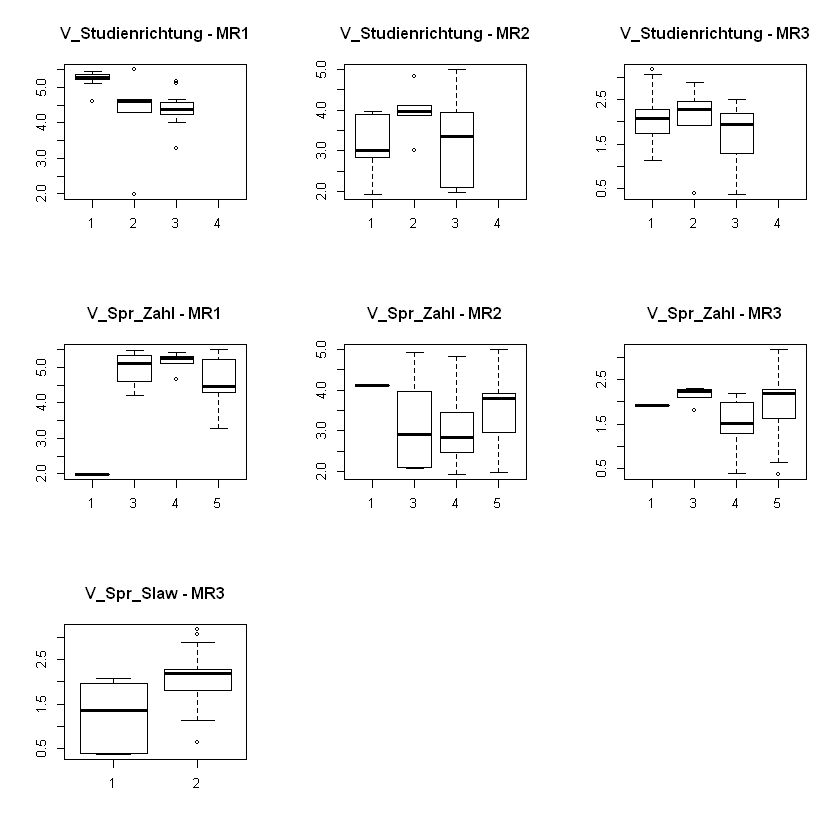

In [293]:
par(mfrow=c(3,3))
boxplot(MR1~V_Studienrichtung, data = Df_total2[which(Df_total2$V_Niveau_DK=='4'),], main = 'V_Studienrichtung - MR1')
boxplot(MR2~V_Studienrichtung, data = Df_total2[which(Df_total2$V_Niveau_DK=='4'),], main = 'V_Studienrichtung - MR2')
boxplot(MR3~V_Studienrichtung, data = Df_total2[which(Df_total2$V_Niveau_DK=='4'),], main = 'V_Studienrichtung - MR3')
boxplot(MR1~V_Spr_Zahl, data = Df_total2[which(Df_total2$V_Niveau_DK=='4'),], main = 'V_Spr_Zahl - MR1')
boxplot(MR2~V_Spr_Zahl, data = Df_total2[which(Df_total2$V_Niveau_DK=='4'),], main = 'V_Spr_Zahl - MR2')
boxplot(MR3~V_Spr_Zahl, data = Df_total2[which(Df_total2$V_Niveau_DK=='4'),], main = 'V_Spr_Zahl - MR3')
boxplot(MR3~V_Spr_Slaw, data = Df_total2[which(Df_total2$V_Niveau_DK=='4'),], main = 'V_Spr_Slaw - MR3')

In [294]:
summary(Df_total2[which(Df_total2$V_Niveau_DK=='4'),vec_V[!vec_V %in% remove]])

 V_L1.Bi.Trilingualismus V_Studienrichtung V_Alter   V_Geschlecht V_Spr_Zahl
 1:10                    1   :12           1   : 0   1   :25      1: 1      
 2:24                    2   : 5           2   : 1   2   : 8      3: 5      
                         3   :12           3   :20   NA's: 1      4: 7      
                         4   : 0           4   :11                5:21      
                         NA's: 5           NA's: 2                          
 V_Spr_Fran V_Spr_Griech V_Spr_Latein V_Spr_Germ V_Spr_Rom V_Spr_Slaw
 1:25       1:10         1:16         1: 6       1:12      1: 5      
 2: 9       2:24         2:18         2:28       2:22      2:29      
                                                                     
                                                                     
                                                                     
 V_Spr_Asiat V_E_Schule_LL V_E_Schule_Eng V_E_Schule_Spr V_E_Univ_DK
 1: 4        1:13          1:14           1:18   

MANOVA (C):

In [295]:
res_anova2A <- MANOVA2_table(Df_total2[which(Df_total2$V_Niveau_DK=='5'),],vec_V[!vec_V %in% remove])
res_anova2A[res_anova2A['Pr(>F)'] < 0.05,]

Df,Pillai,approx F,num Df,den Df,Pr(>F)


### AQ3

MANOVA (gesamt):

In [296]:
res_anova3 <- MANOVA3_table(Df_total,vec_V)
res3 <- res_anova3[res_anova3['Pr(>F)'] < 0.05,]
res3

,Df,Pillai,approx F,num Df,den Df,Pr(>F)
V_Studienrichtung,3,0.09157124,1.847107,18,1056,1.677323e-02
V_Niveau_DK,4,0.31881135,5.528321,24,1532,3.348372e-16
V_Alter,3,0.14401648,3.126426,18,1116,1.151253e-05
V_Spr_Germ,1,0.04993524,3.355069,6,383,3.104306e-03
V_E_Univ_DK,1,0.07562281,5.222172,6,383,3.487517e-05
V_E_Univ_andere,1,0.05889957,3.995063,6,383,6.813516e-04
V_E_Sozial,1,0.03445723,2.278014,6,383,3.575307e-02
V_E_autonom,1,0.03844979,2.552522,6,383,1.953146e-02
V_Met_unbewusst,1,0.03759818,2.493779,6,383,2.225827e-02


In [297]:
write.csv2(res3, file ="D:\\Daten\\DISS\\Daten\\Resmanova3.csv",row.names=TRUE)

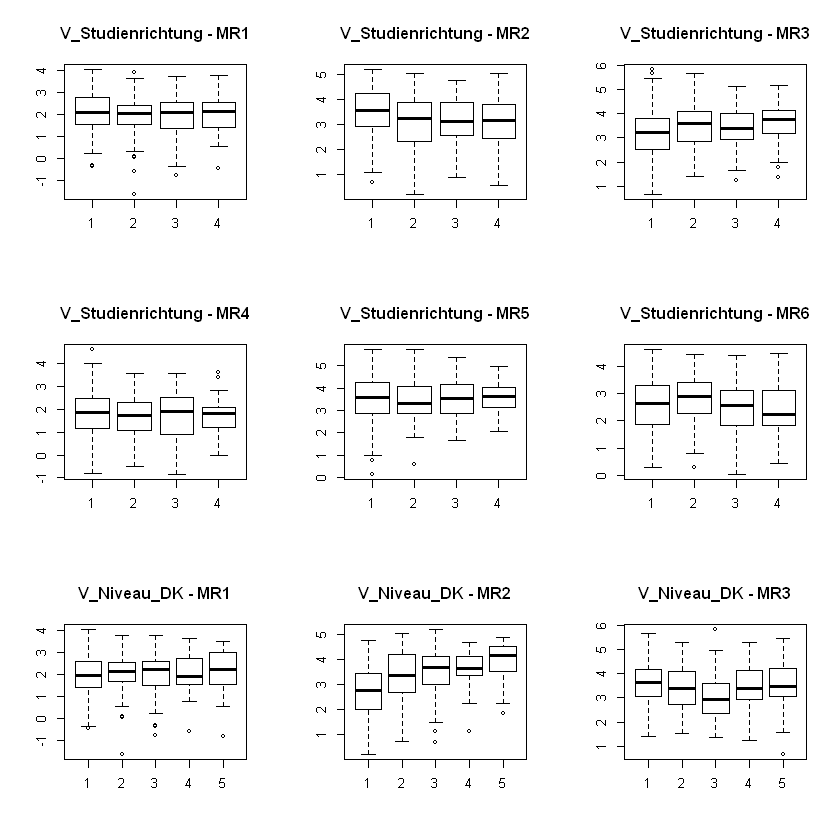

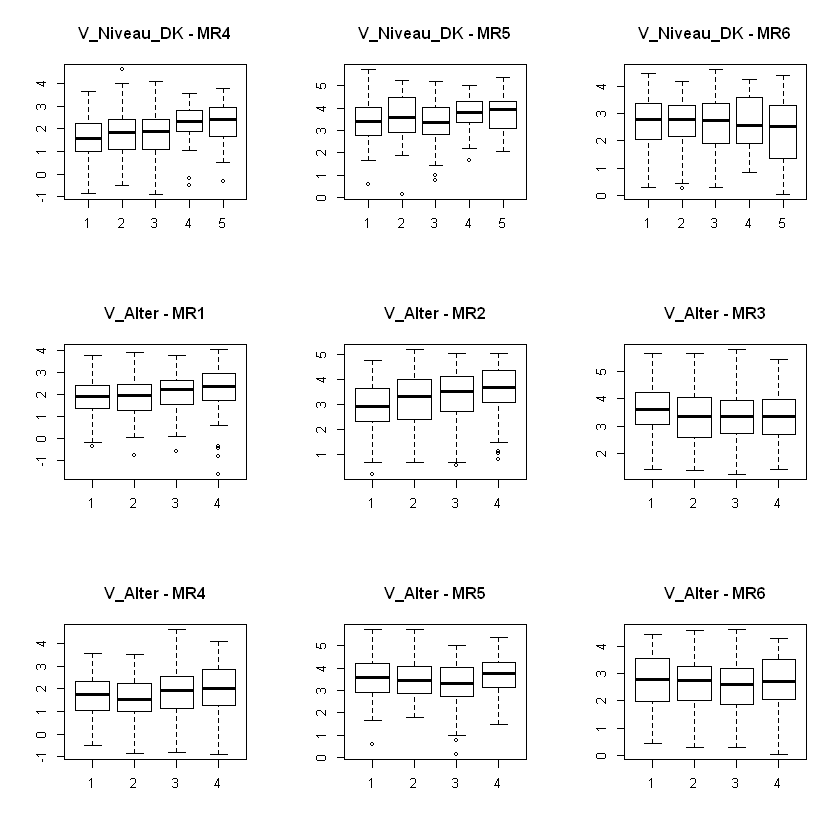

In [298]:
par(mfrow=c(3,3))
boxplot(MR1~V_Studienrichtung, data = Df_total, main = 'V_Studienrichtung - MR1')
boxplot(MR2~V_Studienrichtung, data = Df_total, main = 'V_Studienrichtung - MR2')
boxplot(MR3~V_Studienrichtung, data = Df_total, main = 'V_Studienrichtung - MR3')
boxplot(MR4~V_Studienrichtung, data = Df_total, main = 'V_Studienrichtung - MR4')
boxplot(MR5~V_Studienrichtung, data = Df_total, main = 'V_Studienrichtung - MR5')
boxplot(MR6~V_Studienrichtung, data = Df_total, main = 'V_Studienrichtung - MR6')
boxplot(MR1~V_Niveau_DK, data = Df_total, main = 'V_Niveau_DK - MR1')
boxplot(MR2~V_Niveau_DK, data = Df_total, main = 'V_Niveau_DK - MR2')
boxplot(MR3~V_Niveau_DK, data = Df_total, main = 'V_Niveau_DK - MR3')
boxplot(MR4~V_Niveau_DK, data = Df_total, main = 'V_Niveau_DK - MR4')
boxplot(MR5~V_Niveau_DK, data = Df_total, main = 'V_Niveau_DK - MR5')
boxplot(MR6~V_Niveau_DK, data = Df_total, main = 'V_Niveau_DK - MR6')
boxplot(MR1~V_Alter, data = Df_total, main = 'V_Alter - MR1')
boxplot(MR2~V_Alter, data = Df_total, main = 'V_Alter - MR2')
boxplot(MR3~V_Alter, data = Df_total, main = 'V_Alter - MR3')
boxplot(MR4~V_Alter, data = Df_total, main = 'V_Alter - MR4')
boxplot(MR5~V_Alter, data = Df_total, main = 'V_Alter - MR5')
boxplot(MR6~V_Alter, data = Df_total, main = 'V_Alter - MR6')

In [299]:
ttest_A3 <- tabletstbonf(Df_total,c('V_Spr_Germ',
 'V_E_Univ_DK',
 'V_E_Univ_andere',
 'V_E_Sozial',
 'V_E_autonom',
 'V_Met_unbewusst'
 ))
ttest_A3

,MR1,MR2,MR3,MR4,MR5,MR6
V_Spr_Germ,0.009509611,8.489184e-03,0.04475461,0.04646641,0.64219852,0.9986724
V_E_Univ_DK,0.858553769,8.718888e-06,0.02124233,0.15363378,0.04994204,0.7713164
V_E_Univ_andere,0.401098551,1.388439e-04,0.94092077,0.00162542,0.30199097,0.8193000
V_E_Sozial,0.037403622,8.048110e-02,0.56902404,0.36432732,0.01468615,0.3131402
V_E_autonom,0.026052682,5.708381e-02,0.26383344,0.84828509,0.02254485,0.3051606
V_Met_unbewusst,0.067568088,1.044458e-01,0.05622976,0.62255664,0.04335754,0.2145725


In [300]:
write.csv2(ttest_A3, file ="D:\\Daten\\DISS\\Daten\\Ttest_A3.csv",row.names=TRUE)

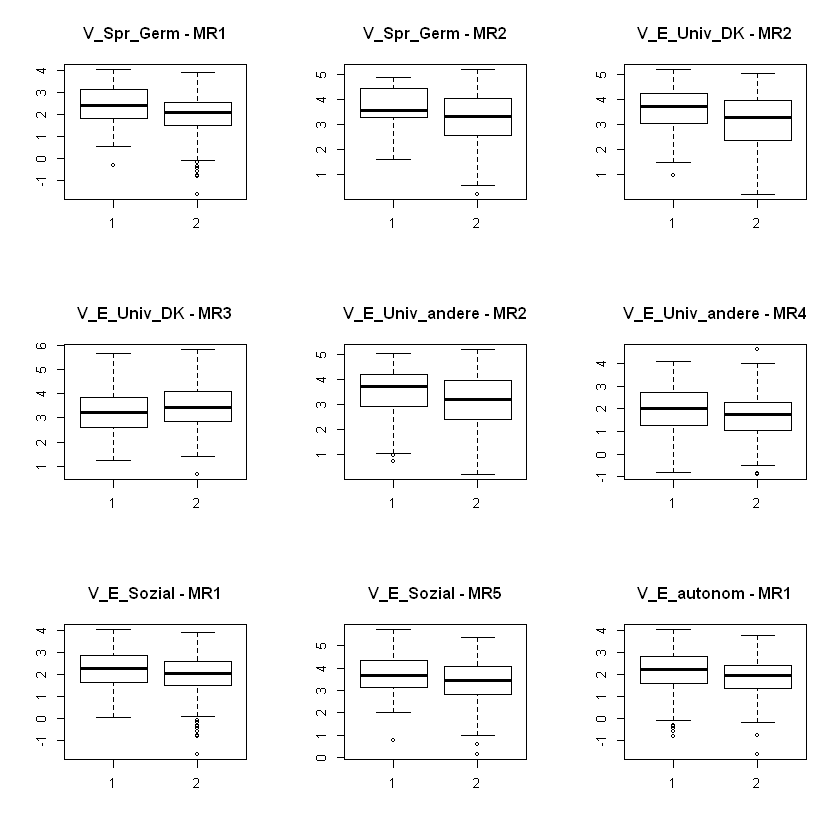

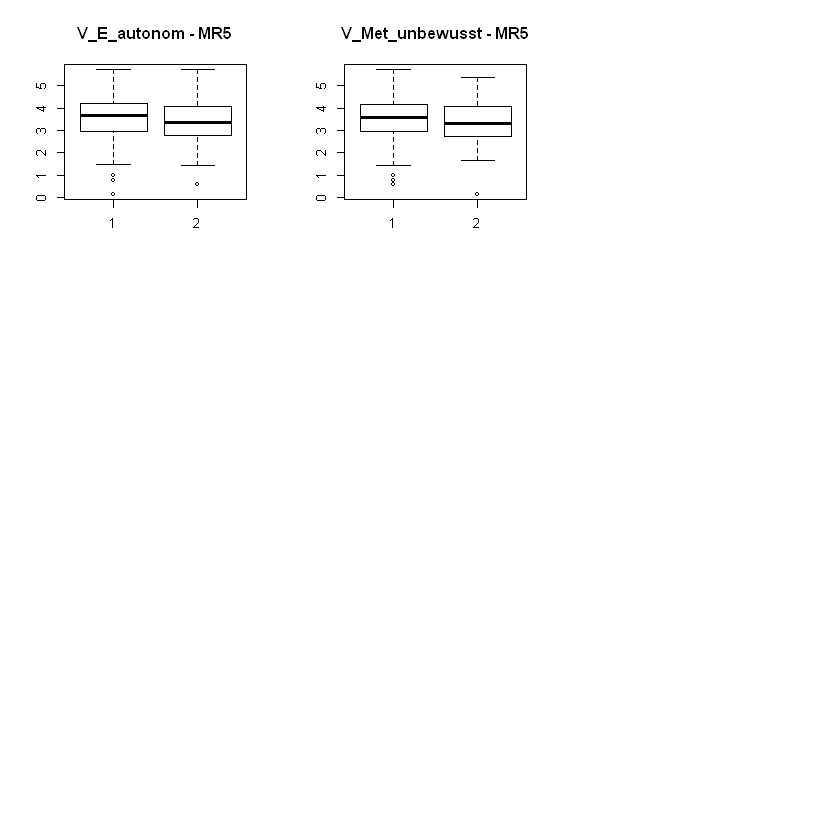

In [301]:
par(mfrow=c(3,3))
boxplot(MR1~V_Spr_Germ, data = Df_total, main = 'V_Spr_Germ - MR1')
boxplot(MR2~V_Spr_Germ, data = Df_total, main = 'V_Spr_Germ - MR2')
boxplot(MR2~V_E_Univ_DK, data = Df_total, main = 'V_E_Univ_DK - MR2')
boxplot(MR3~V_E_Univ_DK, data = Df_total, main = 'V_E_Univ_DK - MR3')
boxplot(MR2~V_E_Univ_andere, data = Df_total, main = 'V_E_Univ_andere - MR2')
boxplot(MR4~V_E_Univ_andere, data = Df_total, main = 'V_E_Univ_andere - MR4')
boxplot(MR1~V_E_Sozial, data = Df_total, main = 'V_E_Sozial - MR1')
boxplot(MR5~V_E_Sozial, data = Df_total, main = 'V_E_Sozial - MR5')
boxplot(MR1~V_E_autonom, data = Df_total, main = 'V_E_autonom - MR1')
boxplot(MR5~V_E_autonom, data = Df_total, main = 'V_E_autonom - MR5')
boxplot(MR5~V_Met_unbewusst, data = Df_total, main = 'V_Met_unbewusst - MR5')

MANOVA (A1):

In [302]:
res_anova3A <- MANOVA3_table(Df_total[which(Df_total$V_Niveau_DK=='1'),],vec_V[!vec_V %in% remove])
res_anova3A[res_anova3A['Pr(>F)'] < 0.05,]

,Df,Pillai,approx F,num Df,den Df,Pr(>F)
V_Studienrichtung,3,0.20634173,1.711108,18,417,0.034811382
V_Spr_Rom,1,0.10895679,2.955101,6,145,0.009450047
V_E_Univ_DK,1,0.12375611,3.413174,6,145,0.003515562
V_E_DK_aktuell,1,0.09381760,2.501989,6,145,0.024718568
V_Met_unbewusst,1,0.08986816,2.386263,6,145,0.031474925


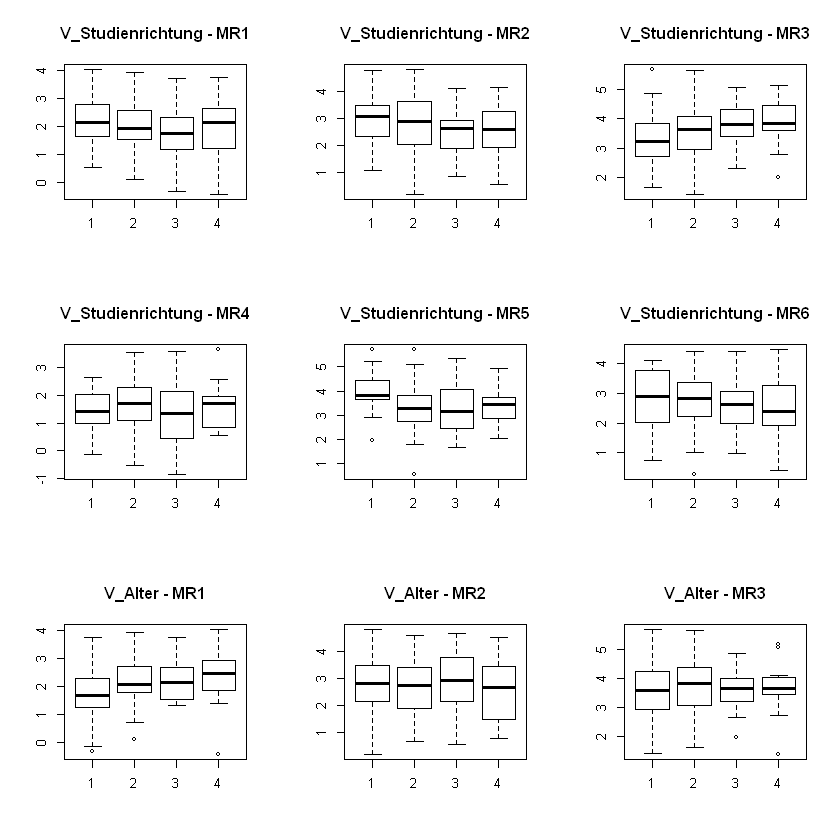

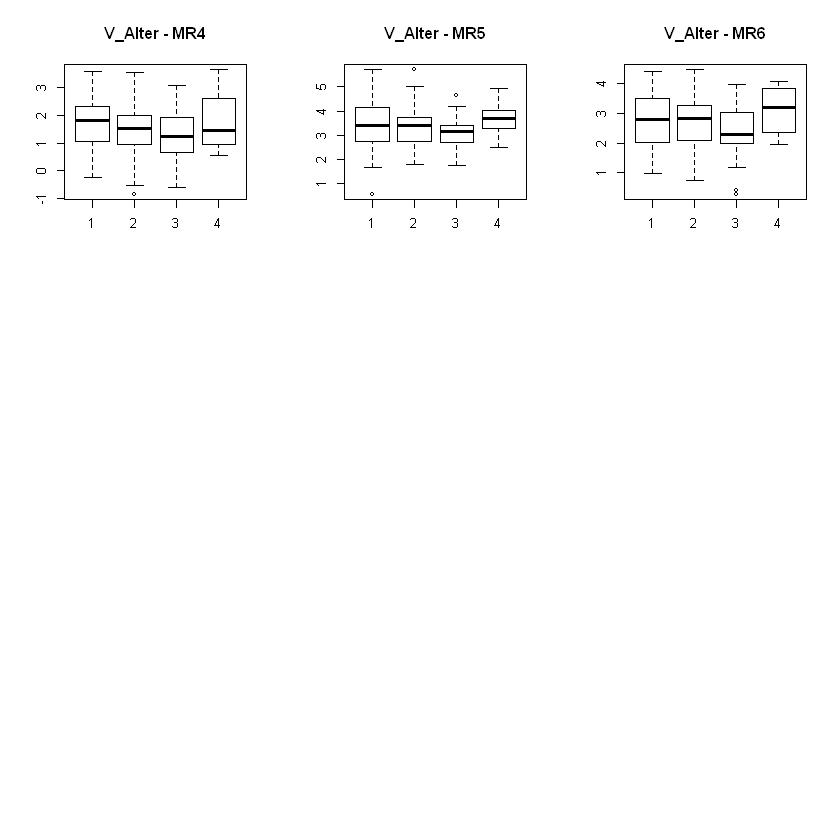

In [303]:
par(mfrow=c(3,3))
boxplot(MR1~V_Studienrichtung, data = Df_total[which(Df_total$V_Niveau_DK=='1'),], main = 'V_Studienrichtung - MR1')
boxplot(MR2~V_Studienrichtung, data = Df_total[which(Df_total$V_Niveau_DK=='1'),], main = 'V_Studienrichtung - MR2')
boxplot(MR3~V_Studienrichtung, data = Df_total[which(Df_total$V_Niveau_DK=='1'),], main = 'V_Studienrichtung - MR3')
boxplot(MR4~V_Studienrichtung, data = Df_total[which(Df_total$V_Niveau_DK=='1'),], main = 'V_Studienrichtung - MR4')
boxplot(MR5~V_Studienrichtung, data = Df_total[which(Df_total$V_Niveau_DK=='1'),], main = 'V_Studienrichtung - MR5')
boxplot(MR6~V_Studienrichtung, data = Df_total[which(Df_total$V_Niveau_DK=='1'),], main = 'V_Studienrichtung - MR6')
boxplot(MR1~V_Alter, data = Df_total[which(Df_total$V_Niveau_DK=='1'),], main = 'V_Alter - MR1')
boxplot(MR2~V_Alter, data = Df_total[which(Df_total$V_Niveau_DK=='1'),], main = 'V_Alter - MR2')
boxplot(MR3~V_Alter, data = Df_total[which(Df_total$V_Niveau_DK=='1'),], main = 'V_Alter - MR3')
boxplot(MR4~V_Alter, data = Df_total[which(Df_total$V_Niveau_DK=='1'),], main = 'V_Alter - MR4')
boxplot(MR5~V_Alter, data = Df_total[which(Df_total$V_Niveau_DK=='1'),], main = 'V_Alter - MR5')
boxplot(MR6~V_Alter, data = Df_total[which(Df_total$V_Niveau_DK=='1'),], main = 'V_Alter - MR6')

In [304]:
tabletstbonf(Df_total[which(Df_total$V_Niveau_DK=='1'),],c('V_Spr_Rom','V_E_Univ_DK','V_E_DK_aktuell'))

,MR1,MR2,MR3,MR4,MR5,MR6
V_Spr_Rom,0.4662990,0.003018491,0.119365425,0.05565165,0.16160193,0.9612046
V_E_Univ_DK,0.3829447,0.002106411,0.216540072,0.91785111,0.01058465,0.3348602
V_E_DK_aktuell,0.8730287,0.023000123,0.005080566,0.47629821,0.41112156,0.4252630


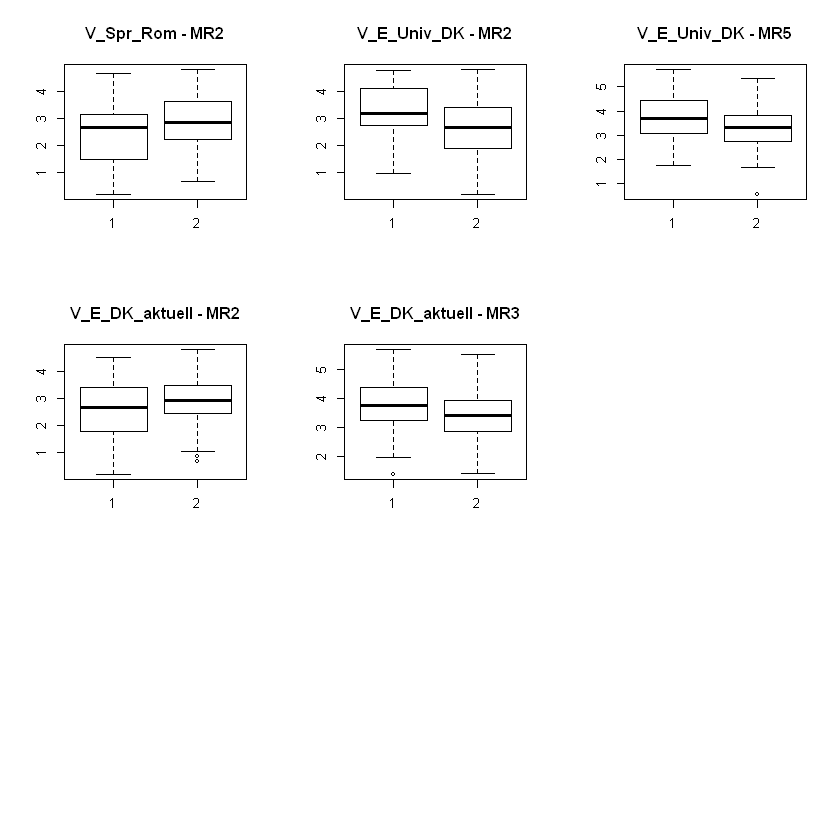

In [305]:
par(mfrow=c(3,3))
boxplot(MR2~V_Spr_Rom, data = Df_total[which(Df_total$V_Niveau_DK=='1'),], main = 'V_Spr_Rom - MR2')
boxplot(MR2~V_E_Univ_DK, data = Df_total[which(Df_total$V_Niveau_DK=='1'),], main = 'V_E_Univ_DK - MR2')
boxplot(MR5~V_E_Univ_DK, data = Df_total[which(Df_total$V_Niveau_DK=='1'),], main = 'V_E_Univ_DK - MR5')
boxplot(MR2~V_E_DK_aktuell, data = Df_total[which(Df_total$V_Niveau_DK=='1'),], main = 'V_E_DK_aktuell - MR2')
boxplot(MR3~V_E_DK_aktuell, data = Df_total[which(Df_total$V_Niveau_DK=='1'),], main = 'V_E_DK_aktuell - MR3')

MANOVA (A2):

In [306]:
res_anova3A <- MANOVA3_table(Df_total[which(Df_total$V_Niveau_DK=='2'),],vec_V[!vec_V %in% remove])
res_anova3A[res_anova3A['Pr(>F)'] < 0.05,]

,Df,Pillai,approx F,num Df,den Df,Pr(>F)
V_Alter,3,0.4668854,1.750971,18,171,0.03510002


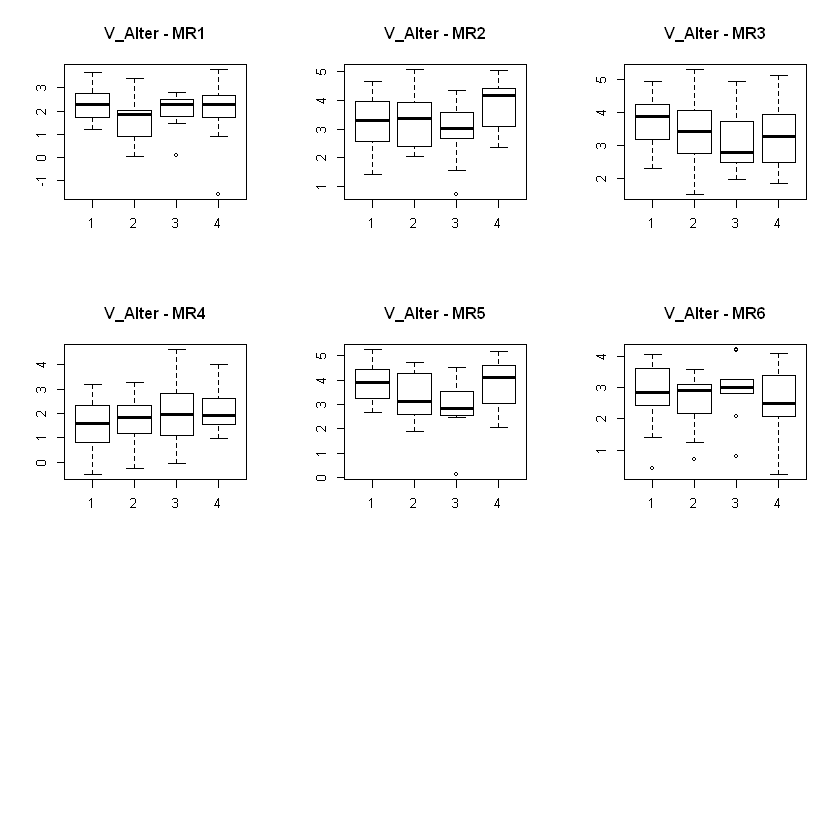

In [307]:
par(mfrow=c(3,3))
boxplot(MR1~V_Alter, data = Df_total[which(Df_total$V_Niveau_DK=='2'),], main = 'V_Alter - MR1')
boxplot(MR2~V_Alter, data = Df_total[which(Df_total$V_Niveau_DK=='2'),], main = 'V_Alter - MR2')
boxplot(MR3~V_Alter, data = Df_total[which(Df_total$V_Niveau_DK=='2'),], main = 'V_Alter - MR3')
boxplot(MR4~V_Alter, data = Df_total[which(Df_total$V_Niveau_DK=='2'),], main = 'V_Alter - MR4')
boxplot(MR5~V_Alter, data = Df_total[which(Df_total$V_Niveau_DK=='2'),], main = 'V_Alter - MR5')
boxplot(MR6~V_Alter, data = Df_total[which(Df_total$V_Niveau_DK=='2'),], main = 'V_Alter - MR6')

MANOVA (B1):

In [308]:
res_anova3A <- MANOVA3_table(Df_total[which(Df_total$V_Niveau_DK=='3'),],vec_V[!vec_V %in% remove])
res_anova3A[res_anova3A['Pr(>F)'] < 0.05,]

,Df,Pillai,approx F,num Df,den Df,Pr(>F)
V_Alter,3,0.3091765,1.761805,18,276,0.02974997


MANOVA (B2):

In [309]:
res_anova3A <- MANOVA3_table(Df_total[which(Df_total$V_Niveau_DK=='4'),],vec_V[!vec_V %in% remove])
res_anova3A[res_anova3A['Pr(>F)'] < 0.05,]

Df,Pillai,approx F,num Df,den Df,Pr(>F)


MANOVA (C):

In [310]:
res_anova3A <- MANOVA3_table(Df_total[which(Df_total$V_Niveau_DK=='5'),],vec_V[!vec_V %in% remove])
res_anova3A[res_anova3A['Pr(>F)'] < 0.05,]

,Df,Pillai,approx F,num Df,den Df,Pr(>F)
V_Studienrichtung,2,0.8738417,2.327848,12,36,0.02506086
V_Spr_Germ,1,0.3815693,2.879315,6,28,0.02588930
V_Spr_Slaw,1,0.3756852,2.808195,6,28,0.02880748
V_E_Univ_andere,1,0.3901282,2.985215,6,28,0.02210124
V_E_Sozial,1,0.3582508,2.605125,6,28,0.03917075
V_Met_Training,1,0.4230311,3.421580,6,28,0.01164883


In [311]:
tabletstbonf(Df_total[which(Df_total$V_Niveau_DK=='5'),],c('V_Spr_Germ','V_Spr_Slaw','V_E_Univ_andere','V_E_Sozial','V_Met_Training'))

,MR1,MR2,MR3,MR4,MR5,MR6
V_Spr_Germ,0.00628497,0.621598382,0.07719146,0.041003749,0.03265956,0.576974121
V_Spr_Slaw,0.05770444,0.841183810,0.04386513,0.019648151,0.86452518,0.718420367
V_E_Univ_andere,0.04228850,0.259766508,0.97487259,0.000381408,0.72471893,0.042642583
V_E_Sozial,0.22242704,0.006735854,0.95121776,0.180514529,0.05232552,0.068031673
V_Met_Training,0.07289639,0.372240437,0.02850798,0.332988573,0.54598613,0.001185974


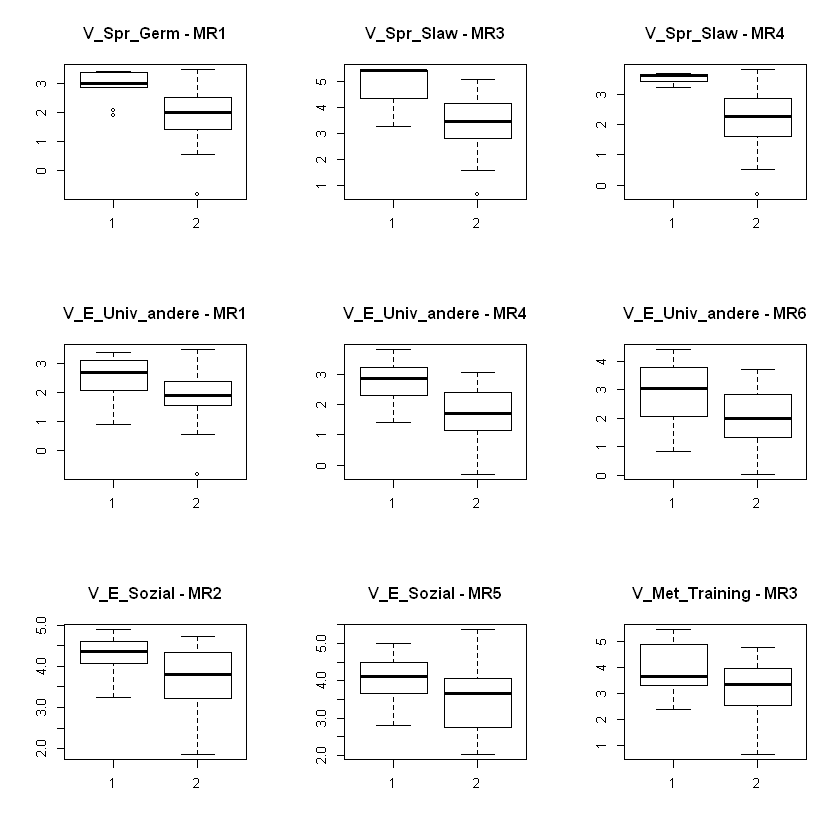

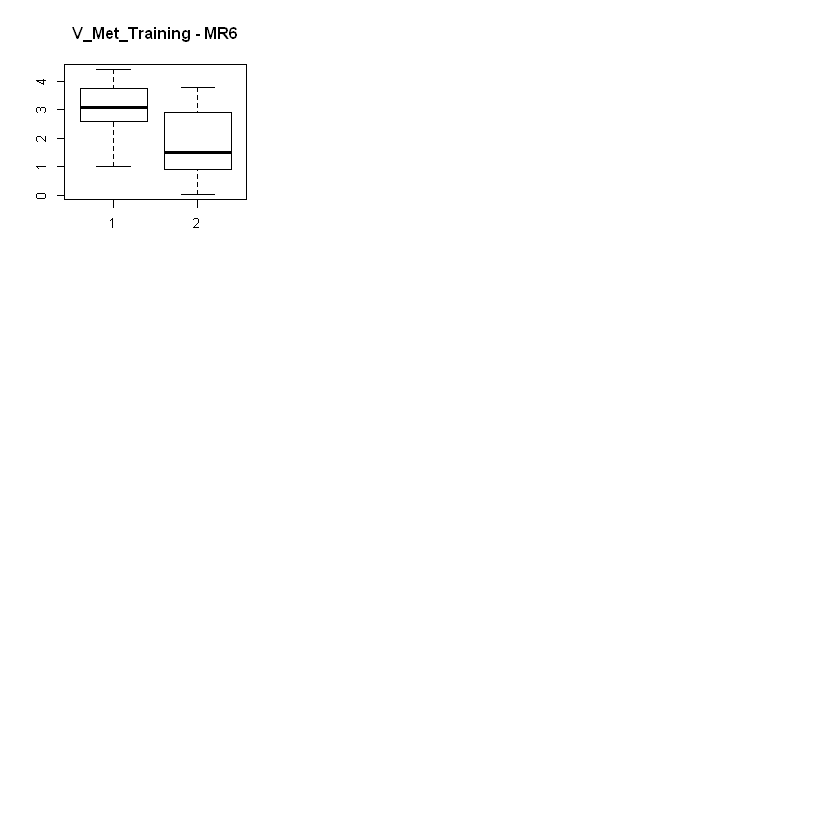

In [312]:
par(mfrow=c(3,3))
boxplot(MR1~V_Spr_Germ, data = Df_total[which(Df_total$V_Niveau_DK=='5'),], main = 'V_Spr_Germ - MR1')
boxplot(MR3~V_Spr_Slaw, data = Df_total[which(Df_total$V_Niveau_DK=='5'),], main = 'V_Spr_Slaw - MR3')
boxplot(MR4~V_Spr_Slaw, data = Df_total[which(Df_total$V_Niveau_DK=='5'),], main = 'V_Spr_Slaw - MR4')
boxplot(MR1~V_E_Univ_andere, data = Df_total[which(Df_total$V_Niveau_DK=='5'),], main = 'V_E_Univ_andere - MR1')
boxplot(MR4~V_E_Univ_andere, data = Df_total[which(Df_total$V_Niveau_DK=='5'),], main = 'V_E_Univ_andere - MR4')
boxplot(MR6~V_E_Univ_andere, data = Df_total[which(Df_total$V_Niveau_DK=='5'),], main = 'V_E_Univ_andere - MR6')
boxplot(MR2~V_E_Sozial, data = Df_total[which(Df_total$V_Niveau_DK=='5'),], main = 'V_E_Sozial - MR2')
boxplot(MR5~V_E_Sozial, data = Df_total[which(Df_total$V_Niveau_DK=='5'),], main = 'V_E_Sozial - MR5')
boxplot(MR3~V_Met_Training, data = Df_total[which(Df_total$V_Niveau_DK=='5'),], main = 'V_Met_Training - MR3')
boxplot(MR6~V_Met_Training, data = Df_total[which(Df_total$V_Niveau_DK=='5'),], main = 'V_Met_Training - MR6')

In [313]:
summary(Df_total[which(Df_total$V_Niveau_DK=='5'),vec_V[!vec_V %in% remove]])

 V_L1.Bi.Trilingualismus V_Studienrichtung V_Alter   V_Geschlecht V_Spr_Zahl
 1: 6                    1   :19           1   : 2   1   :28      1: 2      
 2:29                    2   : 0           2   : 0   2   : 5      3: 8      
                         3   : 5           3   : 9   NA's: 2      4:10      
                         4   : 1           4   :22                5:15      
                         NA's:10           NA's: 2                          
 V_Spr_Fran V_Spr_Griech V_Spr_Latein V_Spr_Germ V_Spr_Rom V_Spr_Slaw
 1:27       1: 9         1:17         1: 9       1:16      1: 3      
 2: 8       2:26         2:18         2:26       2:19      2:32      
                                                                     
                                                                     
                                                                     
 V_Spr_Asiat V_E_Schule_LL V_E_Schule_Eng V_E_Schule_Spr V_E_Univ_DK
 1: 5        1: 9          1:15           1:14   

In [386]:
summary(aov(A.Q4_Score ~ V_Studienrichtung, data = Df_total))

                   Df Sum Sq Mean Sq F value Pr(>F)
V_Studienrichtung   3    776   258.6   1.007   0.39
Residuals         355  91148   256.8               
31 observations deleted due to missingness

In [387]:
summary(aov(A.Q4_Score ~ V_Alter, data = Df_total))

             Df Sum Sq Mean Sq F value   Pr(>F)    
V_Alter       3   4431  1476.9   5.738 0.000758 ***
Residuals   375  96527   257.4                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
11 observations deleted due to missingness

In [388]:
summary(aov(A.Q4_Score ~ V_Niveau_DK, data = Df_total))

             Df Sum Sq Mean Sq F value  Pr(>F)    
V_Niveau_DK   4   9102  2275.4   9.105 4.9e-07 ***
Residuals   385  96218   249.9                    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [389]:
summary(aov(A.Q4_Score ~ V_Spr_Zahl, data = Df_total))

             Df Sum Sq Mean Sq F value   Pr(>F)    
V_Spr_Zahl    3   4687  1562.3   5.992 0.000533 ***
Residuals   386 100633   260.7                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

### Überprüfung weiterer möglicher Einflussfaktoren

In [314]:
res_anova2w <- MANOVA2_table(Df_total2,vec_W)
res_anova2w[res_anova2w['Pr(>F)'] < 0.05,]

,Df,Pillai,approx F,num Df,den Df,Pr(>F)
W_Pilot,1,0.02393868,3.155652,3,386,0.02481395
W_Univ,6,0.10812781,2.368049,18,1140,0.00105728


In [315]:
tabletstbonf2(Df_total2,c('W_Pilot'))

,MR1,MR2,MR3
W_Pilot,0.01182687,0.1034725,0.6951215


In [316]:
remove1 <- c(97)
vec_W[!vec_W %in% remove1]

[1] 93 94 95 96

In [317]:
res_anova2w <- MANOVA2_table(Df_total2[which(Df_total$W_Univ=='1'),],vec_W[!vec_W %in% remove1])
res_anova2w[res_anova2w['Pr(>F)'] < 0.05,]

,Df,Pillai,approx F,num Df,den Df,Pr(>F)
W_Pilot,1,0.06519717,3.440719,3,148,0.01846834


In [318]:
tabletstbonf2(Df_total2[which(Df_total$W_Univ=='1'),],c('W_Pilot'))

,MR1,MR2,MR3
W_Pilot,0.01165647,0.1505467,0.5354974


In [319]:
res_anova3w <- MANOVA3_table(Df_total,vec_W)
res_anova3w[res_anova3w['Pr(>F)'] < 0.05,]

,Df,Pillai,approx F,num Df,den Df,Pr(>F)
W_Papierversion_FB,1,0.03464824,2.291095,6,383,3.475059e-02
W_Univ,6,0.23277042,2.556189,36,2280,1.218541e-06


In [320]:
tabletstbonf(Df_total,c('W_Papierversion_FB'))

,MR1,MR2,MR3,MR4,MR5,MR6
W_Papierversion_FB,0.568019,0.0008198992,0.2495228,0.5317759,0.4491906,0.9810195


### Biplots

Funktionen:

In [321]:
# Using non vectorial programming (for rather than matrices) is less efficient
# except for large data matices
TransformIni <- function(X, InitTransform="None", transform = "Standardize columns") {
  n = nrow(X)
  p = ncol(X)
  RowNames = rownames(X)
  ColNames = colnames(X)
  
  InitTransforms=c("None", "Log", "Logit")
  if (is.numeric(InitTransform)) 
    InitTransform = InitTransforms[InitTransform]
  
  
  ContinuousDataTransform = c("Raw Data", "Substract the global mean", "Double centering", "Column centering", "Standardize columns", "Row centering", 
                              "Standardize rows", "Divide by the column means and center", "Normalized residuals from independence")
  if (is.numeric(transform)) 
    transform = ContinuousDataTransform[transform]
  
  switch(InitTransform, `Log` = {
    if (sum(which(X<=0)) >0) stop("Initial log transformation is not compatible with negative or zero values")
    X = log(X)
    if (nfs > 0) sup.rows = log(sup.rows)
    if (ncs > 0) sup.cols = log(sup.cols)
  },`Logit` = {
    if (sum(which(X<=0)) >0) stop("Initial logit transformation is not compatible with negative values")
    X= X + 0.01 * (X==0) - 0.01 * (X==1)
    x=log(X/(1-X))
  })
  
  
  switch(transform, `Substract the global mean` = {
    gmean = mean(X)
    X = X - gmean
  }, `Double centering` = {
    X = (diag(n) - matrix(1, n, n)/n) %*% X %*% (diag(p) - matrix(1, p, p)/p)
  }, `Column centering` = {
    means = apply(X, 2, mean)
    X=X- matrix(1,n,1) %*% matrix(means,1,p)
  }, `Standardize columns` = {
    means = apply(X, 2, mean)
    stdDevs = apply(X, 2, sd)
    X=(X- matrix(1,n,1) %*% matrix(means,1,p))/(matrix(1,n,1) %*% matrix(stdDevs,1,p))
  }, `Row centering` = {
    means = apply(X, 1, mean)
    X = X %*% (diag(p) - matrix(1, p, p)/p)
  }, `Standardize rows` = {
    means = apply(X, 1, mean)
    stdDevs = apply(X, 1, sd)
    X = solve(diag(stdDevs)) %*% X %*% (diag(p) - matrix(1, p, p)/p)
  }, `Divide by the column means and center` = {
    means = apply(X, 2, mean)
    for (i in (1:p)) X[, i] = X[, i]/means[i]
    X = (diag(n) - matrix(1, n, n)/n) %*% X
  }, `Normalized residuals from independence` = {
    nt = sum(sum(X))
    dr = apply(X,1,sum)
    dc = apply(X,2,sum)
    esp = (t(t(dr)) %*% dc)/nt
    var = t(t(1 - dr/nt)) %*% (1 - dc/nt)
    xp = ((xp - esp)/sqrt(esp))/sqrt(var)
  },`Divide by the range`={
    Rangos=apply(X,2,max)-apply(X,2,min)
    X=X%*%diag(1/Rangos)
  })
  rownames(X) = RowNames
  colnames(X) = ColNames
  return(X)
}

In [322]:
Factor2Binary <- function(y, Name=NULL){  
  if (is.null(Name)) Name="C-"
  ncat=length(levels(y))
  n=length(y)
  Z=matrix(0,n,ncat)
  for (i in 1:n)
    Z[i,as.numeric(y[i])]=1
  colnames(Z) <- paste(Name,levels(y),sep="")
  return(Z)
}

In [323]:
matrixsqrt <- function(S, tol = sqrt(.Machine$double.eps))
{
  ## Square root of a Matrix
  s <- svd(S)
  nz <- s$d > tol
  S12=s$u[, nz] %*% diag(sqrt(s$d[nz])) %*% t(s$v[, nz])
  return(S12)
}

In [324]:
matrixsqrtinv <- function(S, tol = sqrt(.Machine$double.eps))
{
  ## Square root of a Matrix
  s <- svd(S)
  nz <- s$d > tol
  S12=s$u[, nz] %*% diag(1/sqrt(s$d[nz])) %*% t(s$v[, nz])
  return(S12)
}

In [325]:
CanonicalBiplot <- function(X, group, SUP = NULL, InitialTransform = 5, LDA=FALSE, MANOVA = FALSE) {

  cl <- match.call()

  ContinuousDataTransform = c("Raw Data", "Substract the global mean", "Double centering",
                              "Column centering", "Standardize columns", "Row centering",
                              "Standardize rows", "Divide by the column means and center",
                              "Normalized residuals from independence", "Divide by the range",
                              "Within groups standardization", "Ranks")
  if (is.numeric(InitialTransform))
    InitialTransform = ContinuousDataTransform[InitialTransform]

	Bip = list() #Container for the solution
	Bip$call=cl
	# Setting the properties of data
	if (is.null(rownames(X)))
		rownames(X) <- rownames(X, do.NULL = FALSE, prefix = "I")
	RowNames = rownames(X)
	if (is.null(colnames(X)))
		colnames(X) <- colnames(X, do.NULL = FALSE, prefix = "V")
	VarNames = colnames(X)

	Bip$Title = "Canonical/MANOVA Biplot"
	Bip$Type = "Canonical"
	Bip$Non_Scaled_Data = X
	Bip$Means = apply(X, 2, mean)
	Bip$Medians = apply(X, 2, median)
	Bip$Deviations = apply(X, 2, sd)
	Bip$Minima = apply(X, 2, min)
	Bip$Maxima = apply(X, 2, max)
	Bip$P25 = apply(X, 2, quantile)[2, ]
	Bip$P75 = apply(X, 2, quantile)[4, ]
	Bip$GMean = mean(as.matrix(X))
  Bip$Initial_Transformation=InitialTransform
	X = TransformIni(as.matrix(X), transform = InitialTransform) # Initial transformation
	rownames(X) <- RowNames
	if (is.factor(group)) {
		GroupNames = levels(group)
	}
	g = length(levels(group))
	n = dim(X)[1]
	m = dim(X)[2]
	r = min(c(g - 1, m))
	Bip$ncols=m
  Bip$nrows=n
  Bip$dim=r
  if (LDA) {Bip$LDA=lda(X,group)
	Bip$Predict=predict(Bip$LDA,X)$class
	Bip$ClassificationTable = table(group, Bip$Predict)
	Bip$PercentCorrect=diag(prop.table(Bip$ClassificationTable, 1))
	names(Bip$PercentCorrect)=GroupNames
	Bip$TotalPercentCorrect=sum(diag(prop.table(Bip$ClassificationTable)))
	names(Bip$TotalPercentCorrect)= "Total"}
  
  
  if (MANOVA) Bip$MANOVA = manova(X ~ group)

	DimNames = "Dim 1"
	for (i in 2:r) DimNames = c(DimNames, paste("Dim", i))
	Z = Factor2Binary(group) # Matrix of indicators
	ng = colSums(Z)
	S11 = t(Z) %*% Z
	Xb = solve(S11) %*% t(Z) %*% X
	B = t(Xb) %*% S11 %*% Xb
	S = t(X) %*% X - B
	Y = (S11^0.5) %*% Xb %*% matrixsqrtinv(S)
	SV = svd(Y)

	H = matrixsqrt(S) %*% SV$v[, 1:r] # Variable coordinates
	B = matrixsqrtinv(S) %*% SV$v[, 1:r] # Canonical Weigths
	J = Xb %*% B # Center Coordinates
	V = X %*% B # Individual Coordinates
	if (!is.null(SUP)) {
		VS = SUP %*% B
		rownames(VS)=rownames(SUP)
		colnames(VS)=DimNames
		# Bip$SupPredict=predict(Bip$LDA,SUP)$class
	}
	else {
		VS=NULL
		Bip$SupPredict=NULL}

	# Inertia, ANOVAs for each Canonical Variate and MANOVA
	sct = diag(t(V) %*% V)
	sce = diag(t(J) %*% S11 %*% J)
	scr = sct - sce
	fs = (sce/(g - 1))/(scr/(n - g))
	signif2 = df(fs, (g - 1), (n - g))

	vprop = SV$d[1:r]
	iner = (vprop^2/sum(vprop^2)) * 100
	acum = cumsum(iner)

	Bip$EigenValues = vprop
	Bip$Inertia = iner
	Bip$CumInertia = acum
	# colnames(Bip$EigenValues) <- c("Eigenvalue", "Explained Variance", "Cummulative")
	# rownames(Bip$EigenValues) <- DimNames

	lambda = vprop^2
	pill = 1/(1 + lambda)
	pillai = det(diag(pill))
	glh = g - 1
	gle = n - g
	t = ((glh^2 * m^2 - 4)/(m^2 + glh^2 - 5))^0.5
	w = gle + glh - 0.5 * (m + glh + 1)
	df1 = m * glh
	df2 = w * t - 0.5 * (m * glh - 2)
	Bip$Wilksf = ((1 - pillai^(1/t))/(pillai^(1/t))) * (df2/df1)
	Bip$Wilksp = 1 - pf(Bip$Wilksf, df1, df2)

	Bip$GroupContributions = diag(1/rowSums(J^2)) %*% J^2
	Bip$ColContributions = diag(1/rowSums(H^2)) %*% H^2

	Bip$ExplTotal = matrix(0, r, 1)
	Bip$RowContributions = matrix(0, n, r)
	Bip$QLRVars = matrix(0, m, r)

	SCT = sum(X^2)
	SCRows = rowSums(X^2)
	SCCols = colSums(X^2)

	for (j in 1:r) {
		Fitted = V[, 1:j] %*% t(H[, 1:j])
		residuals = X - Fitted
		Bip$ExplTotal[j] = 1 - sum(residuals^2)/SCT
		Bip$RowContributions[, j] = 1 - rowSums(residuals^2)/SCRows
		Bip$QLRVars[, j] = 1 - colSums(residuals^2)/SCCols
	}


	FitX = V %*% t(H)
	Resid = X - FitX

	SCR = sum(Resid^2)
	FIT = 1 - (SCR/SCT)

	sctotal = diag(t(X) %*% X)

	scdentro = diag(S)
	scentre = sctotal - scdentro
	fs = (scentre/glh)/(scdentro/gle)
	pval = 1 - pf(fs, glh, gle)

	Bip$ANOVAS = cbind(sctotal, scentre, scdentro, fs, pval)
	colnames(Bip$ANOVAS) <- c("Total", "Groups", "Error", "F", "p-val")

	falfau = qt(1 - (0.025), (n - g))
	falfab = qt(1 - (0.025/(g * m)), (n - g))
	falfam = sqrt(qf(1 - 0.05, m, (n - g - m + 1)) * (((n - g) * m)/(n - g - m + 1)))
	falfac = sqrt(qchisq(0.95, 2))

	Bip$UnivRad = falfau * diag(solve(sqrt(S11)))/sqrt(n - g)
	Bip$BonfRad = falfab * diag(solve(sqrt(S11)))/sqrt(n - g)
	Bip$MultRad = falfam * diag(solve(sqrt(S11)))/sqrt(n - g)
	Bip$ChisRad = falfac * diag(solve(sqrt(S11)))/sqrt(n - g)

	Bip$n = n
	Bip$p = m
	Bip$g = g
	Bip$X = X
	Bip$groups = group

	Bip$RowCoordinates = V
	rownames(Bip$RowCoordinates) = RowNames
	colnames(Bip$RowCoordinates) = DimNames
	Bip$Sup_Individual_Coord = VS
	Bip$ColCoordinates = H
	rownames(Bip$ColCoordinates) = VarNames
	colnames(Bip$ColCoordinates) = DimNames
	Bip$GroupCoordinates = J
	rownames(Bip$GroupCoordinates) = GroupNames
	colnames(Bip$GroupCoordinates) = DimNames
	Bip$Canonical_Weights = B
	rownames(Bip$Canonical_Weights) = VarNames
	colnames(Bip$Canonical_Weights) = DimNames
	Bip$Structure_Correlations = cor(X, V)
	rownames(Bip$Structure_Correlations) = VarNames
	colnames(Bip$Structure_Correlations) = DimNames
	rownames(Bip$GroupContributions) = GroupNames
	colnames(Bip$GroupContributions) = DimNames
	rownames(Bip$ColContributions) = VarNames
	colnames(Bip$ColContributions) = DimNames
	rownames(Bip$QLRVars) = VarNames
	colnames(Bip$QLRVars) = DimNames
	
	  NGroups=length(levels(group))
	  Bip$Clusters = group
	  Bip$ClusterNames = levels(group)
	
	palette(rainbow(NGroups))
	ClusterColors = palette()
	Bip$ClusterType="us"
	Bip$ClusterColors=ClusterColors
	

	class(Bip) <- "Canonical.Biplot"
	return(Bip)
}

In [326]:
library(ggplot2)

#### AQ2

In [327]:
X <- Df_total2[!is.na(Df_total2$V_Niveau_DK),cbind("MR1","MR2","MR3")]
y <- as.factor(Df_total2$V_Niveau_DK)

Totalcanbip <- CanonicalBiplot(X,y )

#Rescalar resultados
sca <- sum(Totalcanbip$GroupCoordinates^2)
scb <- sum(Totalcanbip$ColCoordinates^2)
sca <- sca/Totalcanbip$g
scb <- scb/Totalcanbip$p
scf <- sqrt(sqrt(scb/sca))

Totalcanbip$Group_Coord <- Totalcanbip$GroupCoordinates*scf
Totalcanbip$Variable_Coord <- Totalcanbip$ColCoordinates/scf
Totalcanbip$Individual_Coord <- Totalcanbip$RowCoordinates*scf
radio <- Totalcanbip$BonfRad

CoordGrupos <- as.data.frame(Totalcanbip$Group_Coord)
CoordVar <- as.data.frame(Totalcanbip$Variable_Coord)
CoordGrupos$clase <- c('N1','N2','N3','N4','N5')
rownames(CoordGrupos) <- c('N1','N2','N3','N4','N5')

In [328]:
Totalcanbip$ColContributions

,Dim 1,Dim 2,Dim 3
MR1,0.5821401,0.224350547,0.19350938
MR2,0.1498195,0.009637163,0.84054334
MR3,0.1180228,0.867835562,0.01414166


In [329]:
Totalcanbip$GroupContributions

,Dim 1,Dim 2,Dim 3
1,0.9926261,0.005047898,0.002326012
2,0.5865973,0.278676556,0.134726191
3,0.5095126,0.489280895,0.001206524
4,0.7975089,0.145322001,0.057169107
5,0.9308971,0.029688501,0.039414438


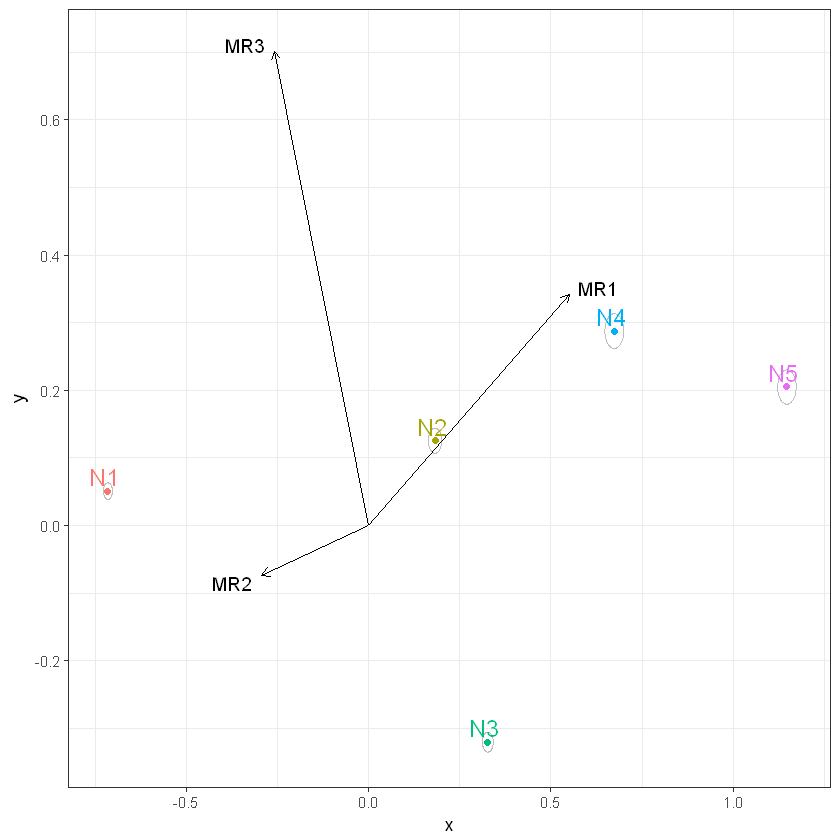

In [330]:
df <- data.frame(x=as.numeric(CoordGrupos[,1]), y=as.numeric(CoordGrupos[,2]), r=as.numeric(radio))

angle <- seq(-pi, pi, length = 100)

myplot <- ggplot()
for (i in 1:length(df$x)) {
        df_temp = data.frame(x = df$x[i] + df$r[i]*sin(angle), y = df$y[i] + df$r[i]*cos(angle))
        myplot = myplot + geom_polygon(data=df_temp, aes(x=x, y=y),color='grey', fill=NA,alpha=0.5, inherit.aes=F)
      }

myplot + geom_point(data=df, aes(x=x, y=y))+
geom_point(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,col=clase))+
geom_text(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,label=rownames(CoordGrupos),col=clase),hjust=0.6, vjust=-0.3,size=5)+
geom_segment(aes(x=0,y=0,xend=`Dim 1`,yend=`Dim 2`),data=CoordVar,arrow = arrow(length = unit(0.2,"cm"),type='open'),size=0.5,col='black')+
geom_text(aes(x=CoordVar$`Dim 1`+.08*sign(CoordVar$`Dim 1`),y=CoordVar$`Dim 2`+.01*sign(CoordVar$`Dim 2`),label=rownames(CoordVar)),data=CoordVar,size=4)+
theme_bw()+theme(legend.position="none")

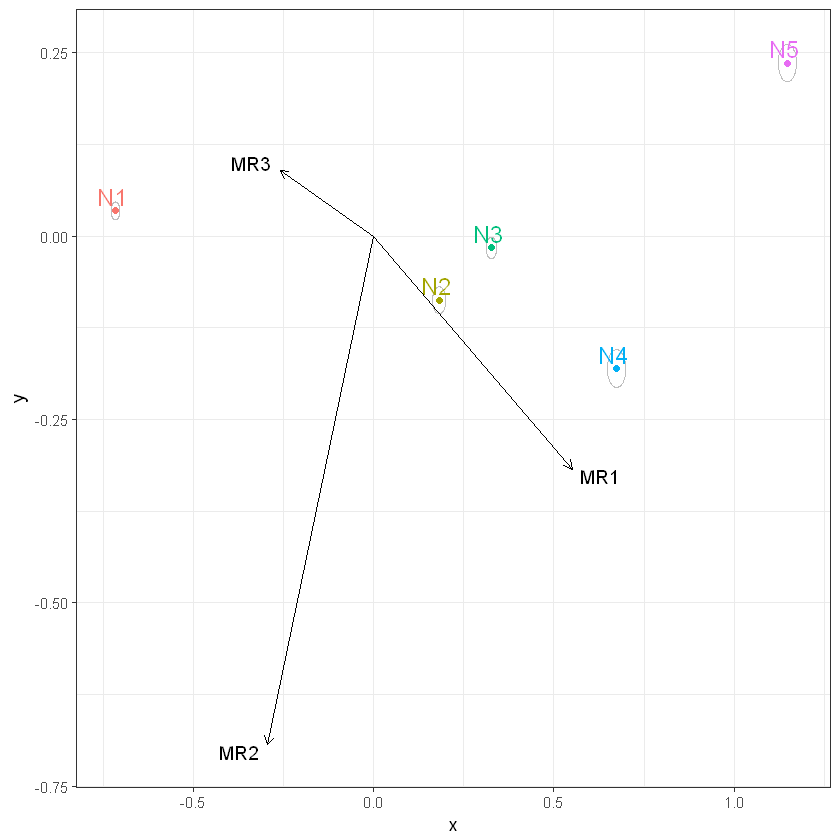

In [331]:
df <- data.frame(x=as.numeric(CoordGrupos[,1]), y=as.numeric(CoordGrupos[,3]), r=as.numeric(radio))
angle <- seq(-pi, pi, length = 100)
myplot <- ggplot()
for (i in 1:length(df$x)) {
        df_temp = data.frame(x = df$x[i] + df$r[i]*sin(angle), y = df$y[i] + df$r[i]*cos(angle))
        myplot = myplot + geom_polygon(data=df_temp, aes(x=x, y=y),color='grey', fill=NA,alpha=0.5, inherit.aes=F)
      }

myplot + geom_point(data=df, aes(x=x, y=y))+
geom_point(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 3`,col=clase))+
geom_text(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 3`,label=rownames(CoordGrupos),col=clase),hjust=0.6, vjust=-0.3,size=5)+
geom_segment(aes(x=0,y=0,xend=`Dim 1`,yend=`Dim 3`),data=CoordVar,arrow = arrow(length = unit(0.2,"cm"),type='open'),size=0.5,col='black')+
geom_text(aes(x=CoordVar$`Dim 1`+.08*sign(CoordVar$`Dim 1`),y=CoordVar$`Dim 3`+.01*sign(CoordVar$`Dim 3`),label=rownames(CoordVar)),data=CoordVar,size=4)+
theme_bw()+theme(legend.position="none")

weitere Biplots für AQ2!

...


#### AQ3

In [332]:
X <- Df_total[!is.na(Df_total$V_Studienrichtung),cbind("MR1","MR2","MR3","MR4","MR5","MR6")]
y <- as.factor(Df_total[!is.na(Df_total$V_Studienrichtung),]$V_Studienrichtung)

Totalcanbip <- CanonicalBiplot(X,y )

#Rescalar resultados
sca <- sum(Totalcanbip$GroupCoordinates^2)
scb <- sum(Totalcanbip$ColCoordinates^2)
sca <- sca/Totalcanbip$g
scb <- scb/Totalcanbip$p
scf <- sqrt(sqrt(scb/sca))

Totalcanbip$Group_Coord <- Totalcanbip$GroupCoordinates*scf
Totalcanbip$Variable_Coord <- Totalcanbip$ColCoordinates/scf
Totalcanbip$Individual_Coord <- Totalcanbip$RowCoordinates*scf
radio <- Totalcanbip$BonfRad

CoordGrupos <- as.data.frame(Totalcanbip$Group_Coord)
CoordVar <- as.data.frame(Totalcanbip$Variable_Coord)
CoordGrupos$clase <- c('Germ','Phil','Trad','Andere')
rownames(CoordGrupos) <- c('Germ','Phil','Trad','Andere')

In [333]:
Totalcanbip$ColContributions

,Dim 1,Dim 2,Dim 3
MR1,0.09991717,0.01173603,0.888346801
MR2,0.84861977,0.05345523,0.097924998
MR3,0.92460048,0.00252171,0.072877808
MR4,0.07142239,0.00179934,0.926778269
MR5,0.04631217,0.81490322,0.138784610
MR6,0.03310246,0.96520421,0.001693326


In [334]:
Totalcanbip$GroupContributions

,Dim 1,Dim 2,Dim 3
1,0.9950867,0.004534434,0.0003788631
2,0.7088398,0.290667621,0.0004925346
3,0.2495376,0.675905092,0.0745572586
4,0.2726230,0.690562402,0.0368145513


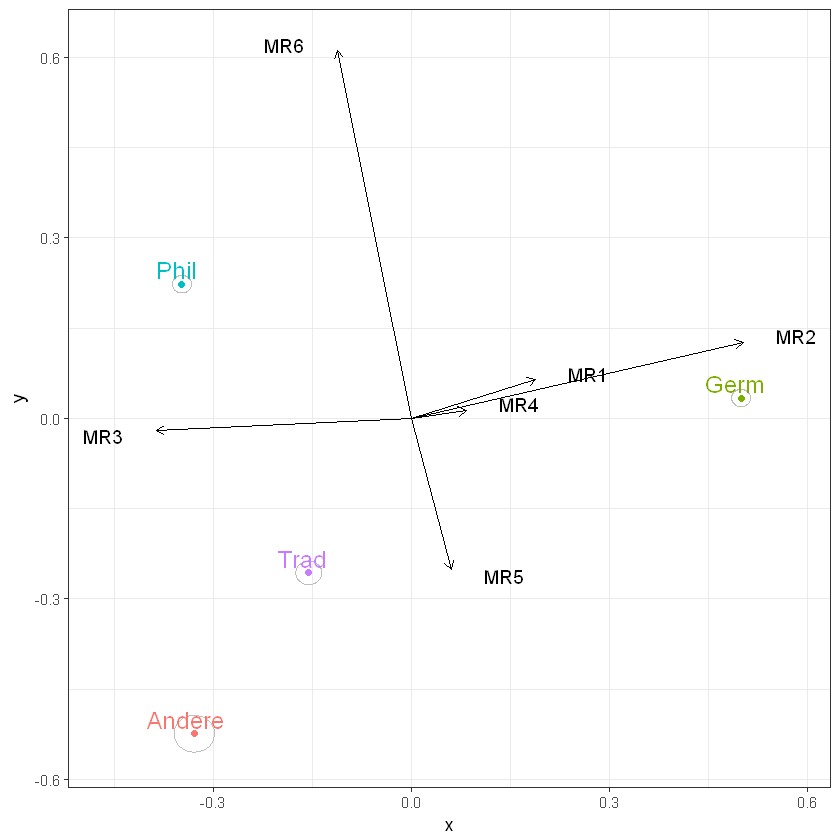

In [335]:
df <- data.frame(x=as.numeric(CoordGrupos[,1]), y=as.numeric(CoordGrupos[,2]), r=as.numeric(radio))

angle <- seq(-pi, pi, length = 100)

myplot <- ggplot()
for (i in 1:length(df$x)) {
        df_temp = data.frame(x = df$x[i] + df$r[i]*sin(angle), y = df$y[i] + df$r[i]*cos(angle))
        myplot = myplot + geom_polygon(data=df_temp, aes(x=x, y=y),color='grey', fill=NA,alpha=0.5, inherit.aes=F)
      }

myplot + geom_point(data=df, aes(x=x, y=y))+
geom_point(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,col=clase))+
geom_text(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,label=rownames(CoordGrupos),col=clase),hjust=0.6, vjust=-0.3,size=5)+
geom_segment(aes(x=0,y=0,xend=`Dim 1`,yend=`Dim 2`),data=CoordVar,arrow = arrow(length = unit(0.2,"cm"),type='open'),size=0.5,col='black')+
geom_text(aes(x=CoordVar$`Dim 1`+.08*sign(CoordVar$`Dim 1`),y=CoordVar$`Dim 2`+.01*sign(CoordVar$`Dim 2`),label=rownames(CoordVar)),data=CoordVar,size=4)+
theme_bw()+theme(legend.position="none")

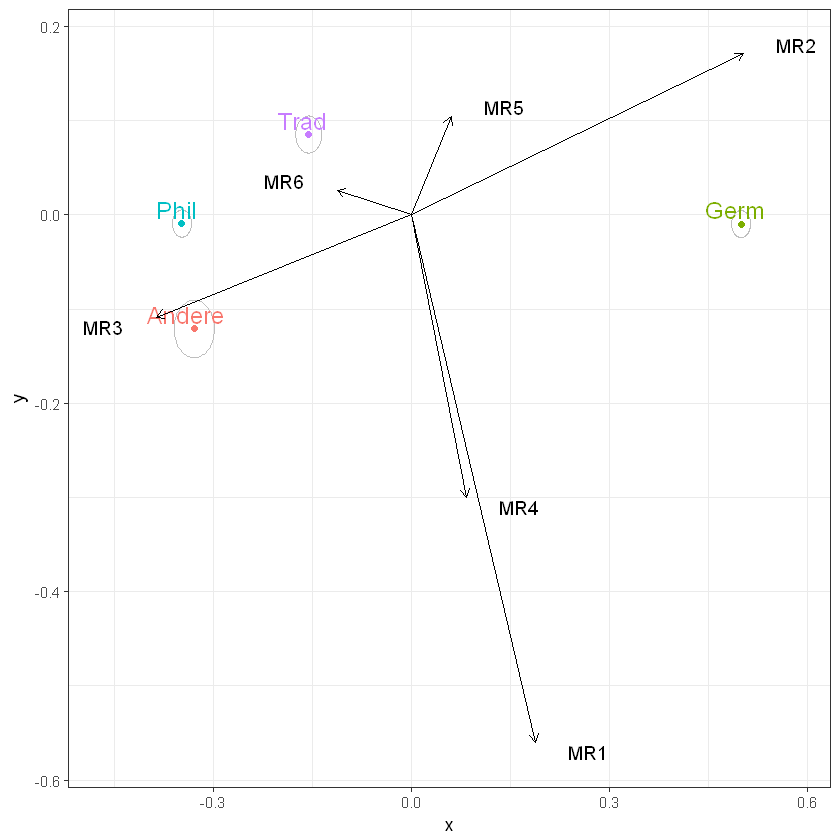

In [336]:
#stat_ellipse(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,level=radio),type='euclid')
df <- data.frame(x=as.numeric(CoordGrupos[,1]), y=as.numeric(CoordGrupos[,3]), r=as.numeric(radio))
angle <- seq(-pi, pi, length = 100)
myplot <- ggplot()
for (i in 1:length(df$x)) {
        df_temp = data.frame(x = df$x[i] + df$r[i]*sin(angle), y = df$y[i] + df$r[i]*cos(angle))
        myplot = myplot + geom_polygon(data=df_temp, aes(x=x, y=y),color='grey', fill=NA,alpha=0.5, inherit.aes=F)
      }

myplot + geom_point(data=df, aes(x=x, y=y))+
geom_point(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 3`,col=clase))+
geom_text(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 3`,label=rownames(CoordGrupos),col=clase),hjust=0.6, vjust=-0.3,size=5)+
geom_segment(aes(x=0,y=0,xend=`Dim 1`,yend=`Dim 3`),data=CoordVar,arrow = arrow(length = unit(0.2,"cm"),type='open'),size=0.5,col='black')+
geom_text(aes(x=CoordVar$`Dim 1`+.08*sign(CoordVar$`Dim 1`),y=CoordVar$`Dim 3`+.01*sign(CoordVar$`Dim 3`),label=rownames(CoordVar)),data=CoordVar,size=4)+
theme_bw()+theme(legend.position="none")

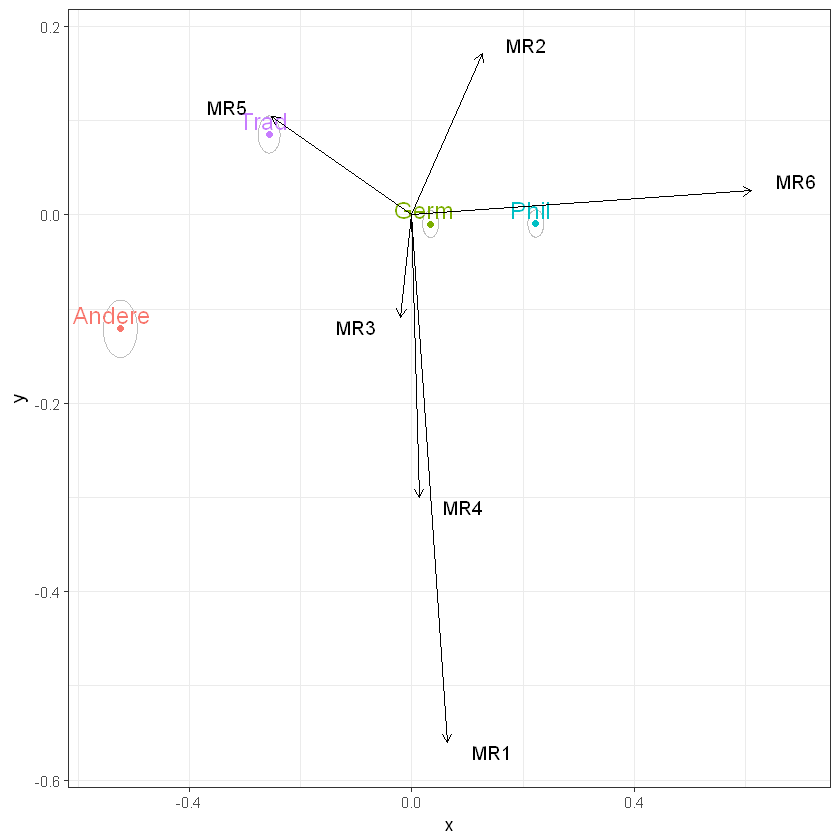

In [337]:
#stat_ellipse(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,level=radio),type='euclid')
df <- data.frame(x=as.numeric(CoordGrupos[,2]), y=as.numeric(CoordGrupos[,3]), r=as.numeric(radio))
angle <- seq(-pi, pi, length = 100)
myplot <- ggplot()
for (i in 1:length(df$x)) {
        df_temp = data.frame(x = df$x[i] + df$r[i]*sin(angle), y = df$y[i] + df$r[i]*cos(angle))
        myplot = myplot + geom_polygon(data=df_temp, aes(x=x, y=y),color='grey', fill=NA,alpha=0.5, inherit.aes=F)
      }

myplot + geom_point(data=df, aes(x=x, y=y))+
geom_point(data=CoordGrupos,aes(x=`Dim 2`,y=`Dim 3`,col=clase))+
geom_text(data=CoordGrupos,aes(x=`Dim 2`,y=`Dim 3`,label=rownames(CoordGrupos),col=clase),hjust=0.6, vjust=-0.3,size=5)+
geom_segment(aes(x=0,y=0,xend=`Dim 2`,yend=`Dim 3`),data=CoordVar,arrow = arrow(length = unit(0.2,"cm"),type='open'),size=0.5,col='black')+
geom_text(aes(x=CoordVar$`Dim 2`+.08*sign(CoordVar$`Dim 2`),y=CoordVar$`Dim 3`+.01*sign(CoordVar$`Dim 3`),label=rownames(CoordVar)),data=CoordVar,size=4)+
theme_bw()+theme(legend.position="none")

In [338]:
X <- Df_total[!is.na(Df_total$V_Niveau_DK),cbind("MR1","MR2","MR3","MR4","MR5","MR6")]
y <- as.factor(Df_total$V_Niveau_DK)

Totalcanbip <- CanonicalBiplot(X,y )

#Rescalar resultados
sca <- sum(Totalcanbip$GroupCoordinates^2)
scb <- sum(Totalcanbip$ColCoordinates^2)
sca <- sca/Totalcanbip$g
scb <- scb/Totalcanbip$p
scf <- sqrt(sqrt(scb/sca))

Totalcanbip$Group_Coord <- Totalcanbip$GroupCoordinates*scf
Totalcanbip$Variable_Coord <- Totalcanbip$ColCoordinates/scf
Totalcanbip$Individual_Coord <- Totalcanbip$RowCoordinates*scf
radio <- Totalcanbip$BonfRad

CoordGrupos <- as.data.frame(Totalcanbip$Group_Coord)
CoordVar <- as.data.frame(Totalcanbip$Variable_Coord)
CoordGrupos$clase <- c('N1','N2','N3','N4','N5')
rownames(CoordGrupos) <- c('N1','N2','N3','N4','N5')

In [339]:
Totalcanbip$ColContributions

,Dim 1,Dim 2,Dim 3,Dim 4
MR1,0.16356850,0.026355198,0.62544578,0.18463052
MR2,0.90340667,0.003009528,0.01835685,0.07522695
MR3,0.14193857,0.716740601,0.07195165,0.06936918
MR4,0.09728555,0.265870909,0.01221827,0.62462527
MR5,0.03490644,0.240562818,0.49780753,0.22672322
MR6,0.04137731,0.049515618,0.85463145,0.05447562


In [340]:
Totalcanbip$GroupContributions

,Dim 1,Dim 2,Dim 3,Dim 4
1,0.9927314,0.006523764,0.0006223361,1.225071e-04
2,0.6254822,0.173338553,0.1086000557,9.257920e-02
3,0.4609709,0.538057243,0.0007411524,2.307419e-04
4,0.6385039,0.310178171,0.0423304983,8.987441e-03
5,0.6888405,0.293796923,0.0173495817,1.298343e-05


In [341]:
#CoordGrupos$clase <- c('Spr_1','Spr_2','Spr_3','Spr_4')
#rownames(CoordGrupos) <- c('Spr1','Spr2','Spr3','Spr4')

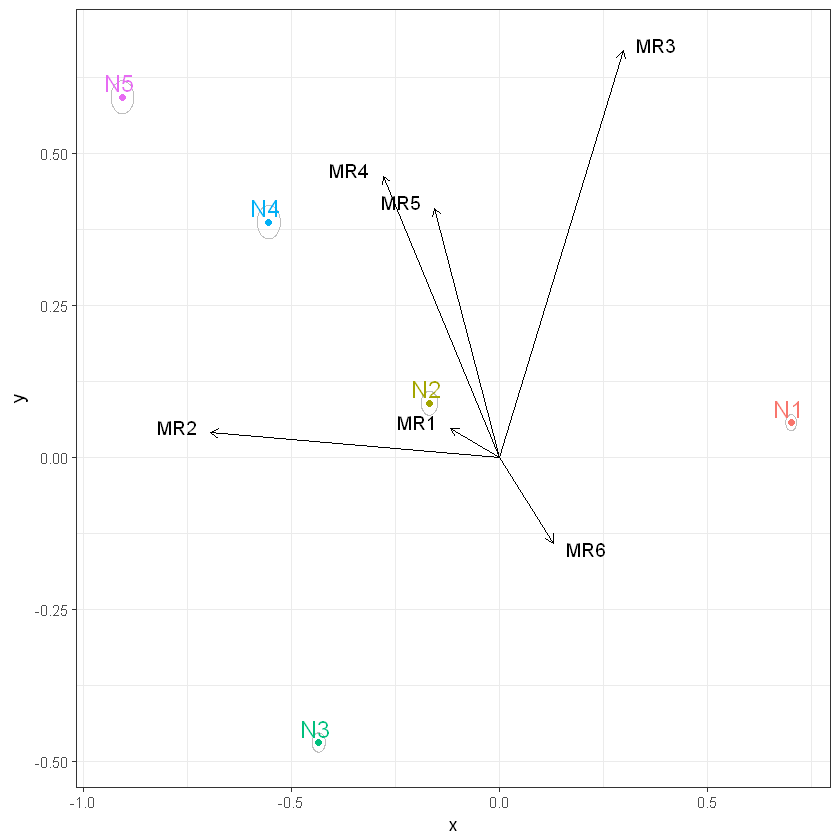

In [342]:
df <- data.frame(x=as.numeric(CoordGrupos[,1]), y=as.numeric(CoordGrupos[,2]), r=as.numeric(radio))

angle <- seq(-pi, pi, length = 100)

myplot <- ggplot()
for (i in 1:length(df$x)) {
        df_temp = data.frame(x = df$x[i] + df$r[i]*sin(angle), y = df$y[i] + df$r[i]*cos(angle))
        myplot = myplot + geom_polygon(data=df_temp, aes(x=x, y=y),color='grey', fill=NA,alpha=0.5, inherit.aes=F)
      }

myplot + geom_point(data=df, aes(x=x, y=y))+
geom_point(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,col=clase))+
geom_text(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,label=rownames(CoordGrupos),col=clase),hjust=0.6, vjust=-0.3,size=5)+
geom_segment(aes(x=0,y=0,xend=`Dim 1`,yend=`Dim 2`),data=CoordVar,arrow = arrow(length = unit(0.2,"cm"),type='open'),size=0.5,col='black')+
geom_text(aes(x=CoordVar$`Dim 1`+.08*sign(CoordVar$`Dim 1`),y=CoordVar$`Dim 2`+.01*sign(CoordVar$`Dim 2`),label=rownames(CoordVar)),data=CoordVar,size=4)+
theme_bw()+theme(legend.position="none")

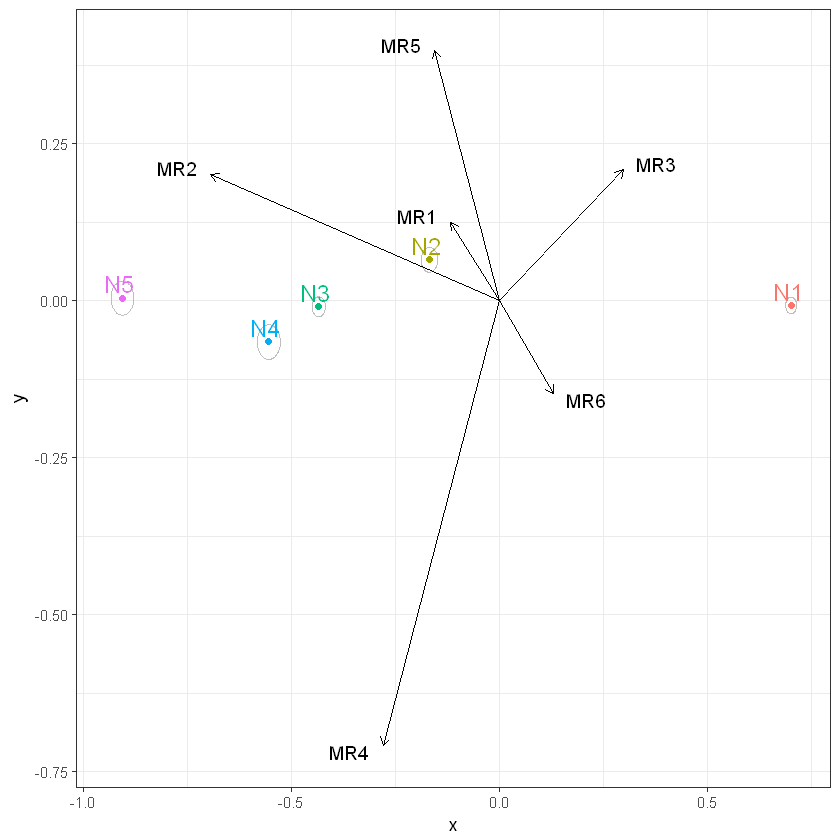

In [343]:
#stat_ellipse(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,level=radio),type='euclid')
df <- data.frame(x=as.numeric(CoordGrupos[,1]), y=as.numeric(CoordGrupos[,4]), r=as.numeric(radio))
angle <- seq(-pi, pi, length = 100)
myplot <- ggplot()
for (i in 1:length(df$x)) {
        df_temp = data.frame(x = df$x[i] + df$r[i]*sin(angle), y = df$y[i] + df$r[i]*cos(angle))
        myplot = myplot + geom_polygon(data=df_temp, aes(x=x, y=y),color='grey', fill=NA,alpha=0.5, inherit.aes=F)
      }

myplot + geom_point(data=df, aes(x=x, y=y))+
geom_point(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 4`,col=clase))+
geom_text(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 4`,label=rownames(CoordGrupos),col=clase),hjust=0.6, vjust=-0.3,size=5)+
geom_segment(aes(x=0,y=0,xend=`Dim 1`,yend=`Dim 4`),data=CoordVar,arrow = arrow(length = unit(0.2,"cm"),type='open'),size=0.5,col='black')+
geom_text(aes(x=CoordVar$`Dim 1`+.08*sign(CoordVar$`Dim 1`),y=CoordVar$`Dim 4`+.01*sign(CoordVar$`Dim 4`),label=rownames(CoordVar)),data=CoordVar,size=4)+
theme_bw()+theme(legend.position="none")

In [344]:
X <- Df_total[!is.na(Df_total$V_Alter),cbind("MR1","MR2","MR3","MR4","MR5","MR6")]
y <- as.factor(Df_total[!is.na(Df_total$V_Alter),]$V_Alter)

Totalcanbip <- CanonicalBiplot(X,y )

#Rescalar resultados
sca <- sum(Totalcanbip$GroupCoordinates^2)
scb <- sum(Totalcanbip$ColCoordinates^2)
sca <- sca/Totalcanbip$g
scb <- scb/Totalcanbip$p
scf <- sqrt(sqrt(scb/sca))

Totalcanbip$Group_Coord <- Totalcanbip$GroupCoordinates*scf
Totalcanbip$Variable_Coord <- Totalcanbip$ColCoordinates/scf
Totalcanbip$Individual_Coord <- Totalcanbip$RowCoordinates*scf
radio <- Totalcanbip$BonfRad

CoordGrupos <- as.data.frame(Totalcanbip$Group_Coord)
CoordVar <- as.data.frame(Totalcanbip$Variable_Coord)
CoordGrupos$clase <- c('-18','19','20','21+')
rownames(CoordGrupos) <- c('-18','19','20','21+')

In [345]:
Totalcanbip$ColContributions

,Dim 1,Dim 2,Dim 3
MR1,0.791563983,0.0066137833,0.2018222
MR2,0.861502666,0.0008190312,0.1376783
MR3,0.248720818,0.3434437471,0.4078354
MR4,0.254757663,0.3095463824,0.4356960
MR5,0.004396983,0.7181937455,0.2774093
MR6,0.068633659,0.6763553198,0.2550110


In [346]:
Totalcanbip$GroupContributions

,Dim 1,Dim 2,Dim 3
1,0.8653617,0.1110603,0.023577998
2,0.4723673,0.1852779,0.342354878
3,0.2988942,0.6133249,0.087780894
4,0.8387799,0.1582586,0.002961436


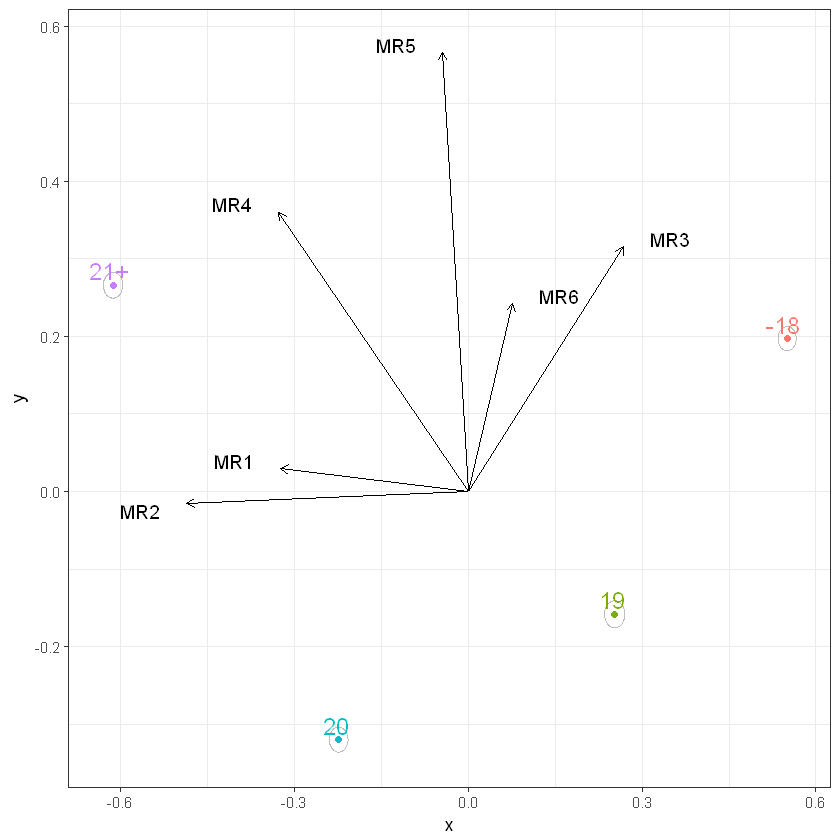

In [347]:
df <- data.frame(x=as.numeric(CoordGrupos[,1]), y=as.numeric(CoordGrupos[,2]), r=as.numeric(radio))

angle <- seq(-pi, pi, length = 100)

myplot <- ggplot()
for (i in 1:length(df$x)) {
        df_temp = data.frame(x = df$x[i] + df$r[i]*sin(angle), y = df$y[i] + df$r[i]*cos(angle))
        myplot = myplot + geom_polygon(data=df_temp, aes(x=x, y=y),color='grey', fill=NA,alpha=0.5, inherit.aes=F)
      }

myplot + geom_point(data=df, aes(x=x, y=y))+
geom_point(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,col=clase))+
geom_text(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,label=rownames(CoordGrupos),col=clase),hjust=0.6, vjust=-0.3,size=5)+
geom_segment(aes(x=0,y=0,xend=`Dim 1`,yend=`Dim 2`),data=CoordVar,arrow = arrow(length = unit(0.2,"cm"),type='open'),size=0.5,col='black')+
geom_text(aes(x=CoordVar$`Dim 1`+.08*sign(CoordVar$`Dim 1`),y=CoordVar$`Dim 2`+.01*sign(CoordVar$`Dim 2`),label=rownames(CoordVar)),data=CoordVar,size=4)+
theme_bw()+theme(legend.position="none")

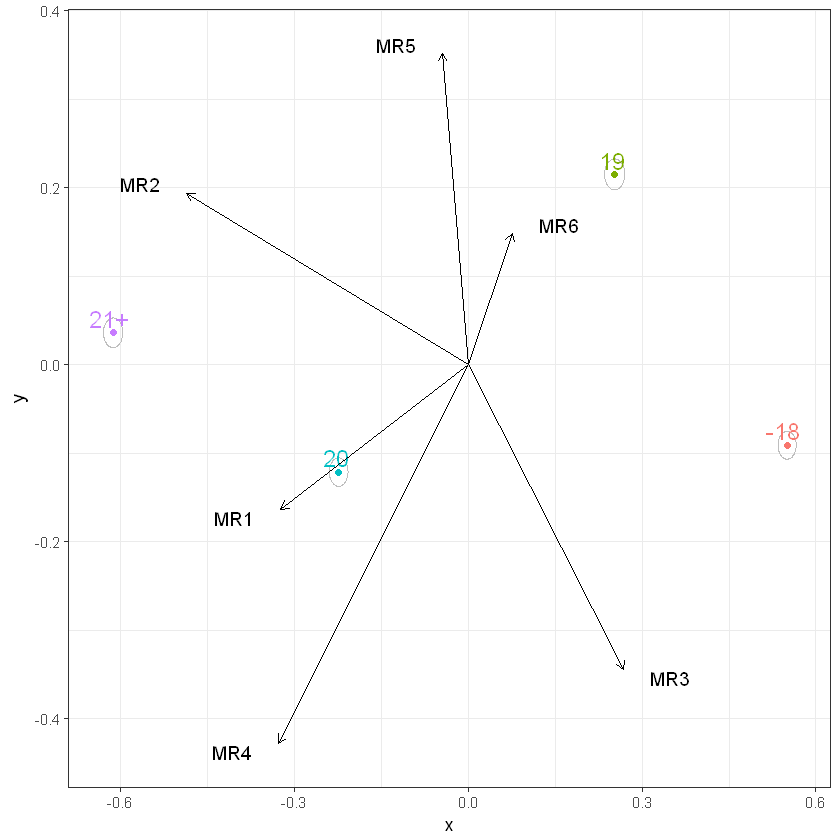

In [348]:
#stat_ellipse(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,level=radio),type='euclid')
df <- data.frame(x=as.numeric(CoordGrupos[,1]), y=as.numeric(CoordGrupos[,3]), r=as.numeric(radio))
angle <- seq(-pi, pi, length = 100)
myplot <- ggplot()
for (i in 1:length(df$x)) {
        df_temp = data.frame(x = df$x[i] + df$r[i]*sin(angle), y = df$y[i] + df$r[i]*cos(angle))
        myplot = myplot + geom_polygon(data=df_temp, aes(x=x, y=y),color='grey', fill=NA,alpha=0.5, inherit.aes=F)
      }

myplot + geom_point(data=df, aes(x=x, y=y))+
geom_point(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 3`,col=clase))+
geom_text(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 3`,label=rownames(CoordGrupos),col=clase),hjust=0.6, vjust=-0.3,size=5)+
geom_segment(aes(x=0,y=0,xend=`Dim 1`,yend=`Dim 3`),data=CoordVar,arrow = arrow(length = unit(0.2,"cm"),type='open'),size=0.5,col='black')+
geom_text(aes(x=CoordVar$`Dim 1`+.08*sign(CoordVar$`Dim 1`),y=CoordVar$`Dim 3`+.01*sign(CoordVar$`Dim 3`),label=rownames(CoordVar)),data=CoordVar,size=4)+
theme_bw()+theme(legend.position="none")

In [349]:
Df_total_A2 <- Df_total[which(Df_total$V_Niveau_DK=='2'),]

In [350]:
X <- Df_total_A2[!is.na(Df_total_A2$V_Alter),cbind("MR1","MR2","MR3","MR4","MR5","MR6")]
y <- as.factor(Df_total_A2[!is.na(Df_total_A2$V_Alter),]$V_Alter)

Totalcanbip <- CanonicalBiplot(X,y )

#Rescalar resultados
sca <- sum(Totalcanbip$GroupCoordinates^2)
scb <- sum(Totalcanbip$ColCoordinates^2)
sca <- sca/Totalcanbip$g
scb <- scb/Totalcanbip$p
scf <- sqrt(sqrt(scb/sca))

Totalcanbip$Group_Coord <- Totalcanbip$GroupCoordinates*scf
Totalcanbip$Variable_Coord <- Totalcanbip$ColCoordinates/scf
Totalcanbip$Individual_Coord <- Totalcanbip$RowCoordinates*scf
radio <- Totalcanbip$BonfRad

CoordGrupos <- as.data.frame(Totalcanbip$Group_Coord)
CoordVar <- as.data.frame(Totalcanbip$Variable_Coord)
CoordGrupos$clase <- c('-18','19','20','21+')
rownames(CoordGrupos) <- c('-18','19','20','21+')

In [351]:
Totalcanbip$ColContributions

,Dim 1,Dim 2,Dim 3
MR1,0.096999587,0.11310893,0.78989148
MR2,0.575299994,0.38784797,0.03685204
MR3,0.163341412,0.68360933,0.15304925
MR4,0.001564054,0.77935401,0.21908194
MR5,0.931981620,0.06301356,0.00500482
MR6,0.130796631,0.22616593,0.64303744


In [352]:
Totalcanbip$GroupContributions

,Dim 1,Dim 2,Dim 3
1,0.1112045,0.869554213,0.01924124
2,0.3236111,0.005308858,0.67108009
3,0.8258612,0.034752736,0.13938606
4,0.5077238,0.480155822,0.01212037


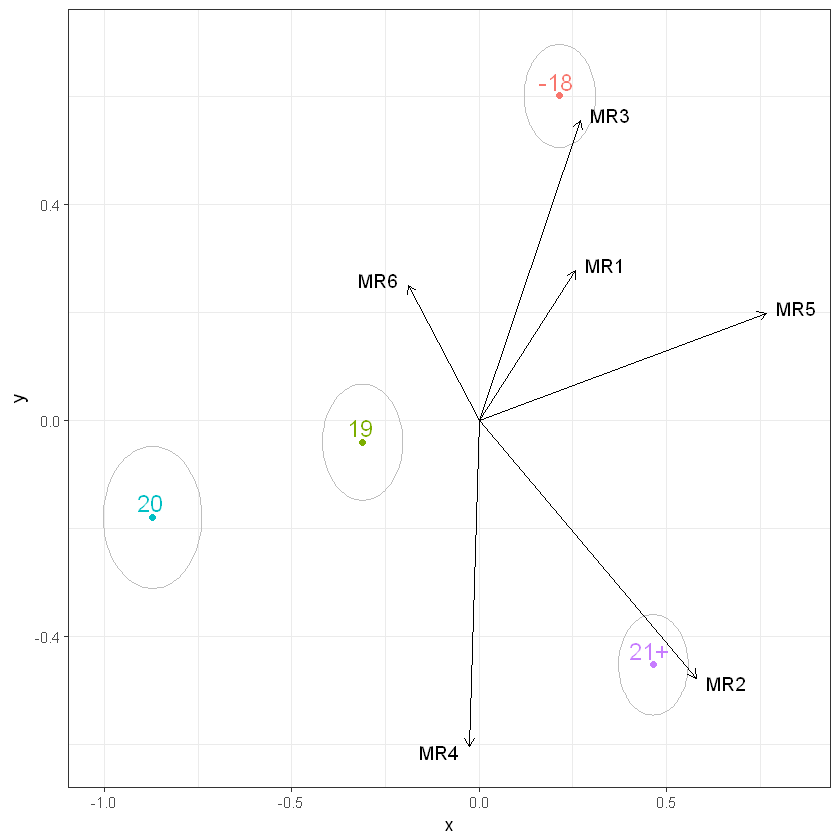

In [353]:
df <- data.frame(x=as.numeric(CoordGrupos[,1]), y=as.numeric(CoordGrupos[,2]), r=as.numeric(radio))

angle <- seq(-pi, pi, length = 100)

myplot <- ggplot()
for (i in 1:length(df$x)) {
        df_temp = data.frame(x = df$x[i] + df$r[i]*sin(angle), y = df$y[i] + df$r[i]*cos(angle))
        myplot = myplot + geom_polygon(data=df_temp, aes(x=x, y=y),color='grey', fill=NA,alpha=0.5, inherit.aes=F)
      }

myplot + geom_point(data=df, aes(x=x, y=y))+
geom_point(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,col=clase))+
geom_text(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,label=rownames(CoordGrupos),col=clase),hjust=0.6, vjust=-0.3,size=5)+
geom_segment(aes(x=0,y=0,xend=`Dim 1`,yend=`Dim 2`),data=CoordVar,arrow = arrow(length = unit(0.2,"cm"),type='open'),size=0.5,col='black')+
geom_text(aes(x=CoordVar$`Dim 1`+.08*sign(CoordVar$`Dim 1`),y=CoordVar$`Dim 2`+.01*sign(CoordVar$`Dim 2`),label=rownames(CoordVar)),data=CoordVar,size=4)+
theme_bw()+theme(legend.position="none")

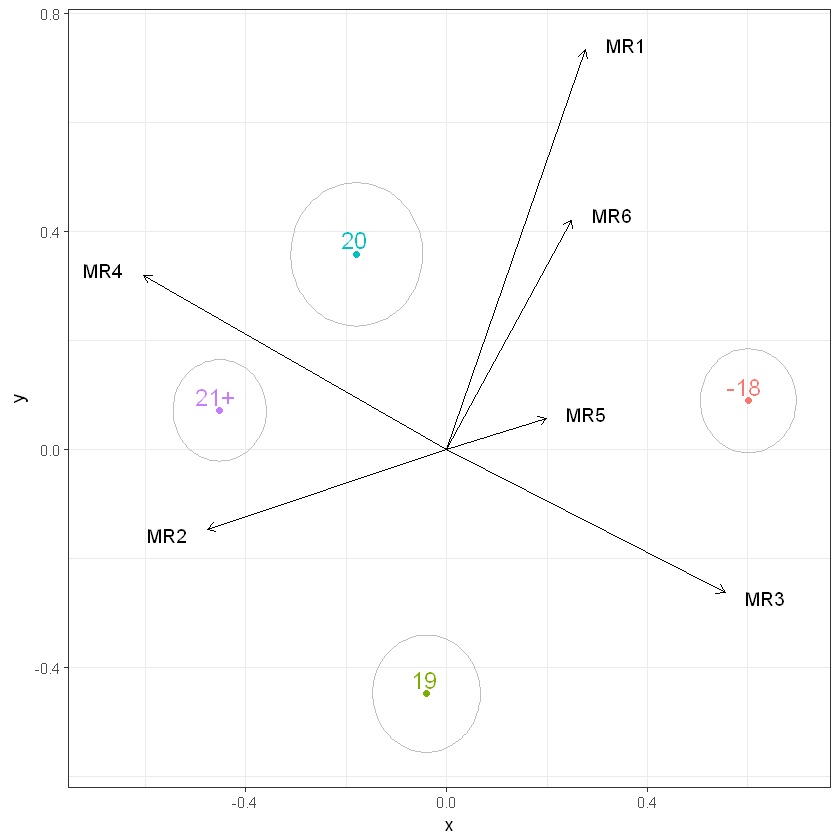

In [354]:
#stat_ellipse(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,level=radio),type='euclid')
df <- data.frame(x=as.numeric(CoordGrupos[,2]), y=as.numeric(CoordGrupos[,3]), r=as.numeric(radio))
angle <- seq(-pi, pi, length = 100)
myplot <- ggplot()
for (i in 1:length(df$x)) {
        df_temp = data.frame(x = df$x[i] + df$r[i]*sin(angle), y = df$y[i] + df$r[i]*cos(angle))
        myplot = myplot + geom_polygon(data=df_temp, aes(x=x, y=y),color='grey', fill=NA,alpha=0.5, inherit.aes=F)
      }

myplot + geom_point(data=df, aes(x=x, y=y))+
geom_point(data=CoordGrupos,aes(x=`Dim 2`,y=`Dim 3`,col=clase))+
geom_text(data=CoordGrupos,aes(x=`Dim 2`,y=`Dim 3`,label=rownames(CoordGrupos),col=clase),hjust=0.6, vjust=-0.3,size=5)+
geom_segment(aes(x=0,y=0,xend=`Dim 2`,yend=`Dim 3`),data=CoordVar,arrow = arrow(length = unit(0.2,"cm"),type='open'),size=0.5,col='black')+
geom_text(aes(x=CoordVar$`Dim 2`+.08*sign(CoordVar$`Dim 2`),y=CoordVar$`Dim 3`+.01*sign(CoordVar$`Dim 3`),label=rownames(CoordVar)),data=CoordVar,size=4)+
theme_bw()+theme(legend.position="none")

In [355]:
Df_total_A1 <- Df_total[which(Df_total$V_Niveau_DK=='1'),]

In [356]:
X <- Df_total_A1[!is.na(Df_total_A1$V_Alter),cbind("MR1","MR2","MR3","MR4","MR5","MR6")]
y <- as.factor(Df_total_A1[!is.na(Df_total_A1$V_Alter),]$V_Alter)

Totalcanbip <- CanonicalBiplot(X,y )

#Rescalar resultados
sca <- sum(Totalcanbip$GroupCoordinates^2)
scb <- sum(Totalcanbip$ColCoordinates^2)
sca <- sca/Totalcanbip$g
scb <- scb/Totalcanbip$p
scf <- sqrt(sqrt(scb/sca))

Totalcanbip$Group_Coord <- Totalcanbip$GroupCoordinates*scf
Totalcanbip$Variable_Coord <- Totalcanbip$ColCoordinates/scf
Totalcanbip$Individual_Coord <- Totalcanbip$RowCoordinates*scf
radio <- Totalcanbip$BonfRad

CoordGrupos <- as.data.frame(Totalcanbip$Group_Coord)
CoordVar <- as.data.frame(Totalcanbip$Variable_Coord)
CoordGrupos$clase <- c('-18','19','20','21+')
rownames(CoordGrupos) <- c('-18','19','20','21+')

In [357]:
Totalcanbip$ColContributions

,Dim 1,Dim 2,Dim 3
MR1,0.43719314,0.3592926647,0.20351420
MR2,0.02644795,0.9605139801,0.01303807
MR3,0.04535560,0.0626422468,0.89200215
MR4,0.43615854,0.0002847818,0.56355668
MR5,0.28820865,0.5003159218,0.21147543
MR6,0.14212717,0.8095826679,0.04829016


In [358]:
Totalcanbip$GroupContributions

,Dim 1,Dim 2,Dim 3
1,0.898702858,0.1011832,0.0001139064
2,0.705963424,0.2187763,0.0752602974
3,0.800343026,0.1828809,0.0167760994
4,0.009073422,0.9255783,0.0653482319


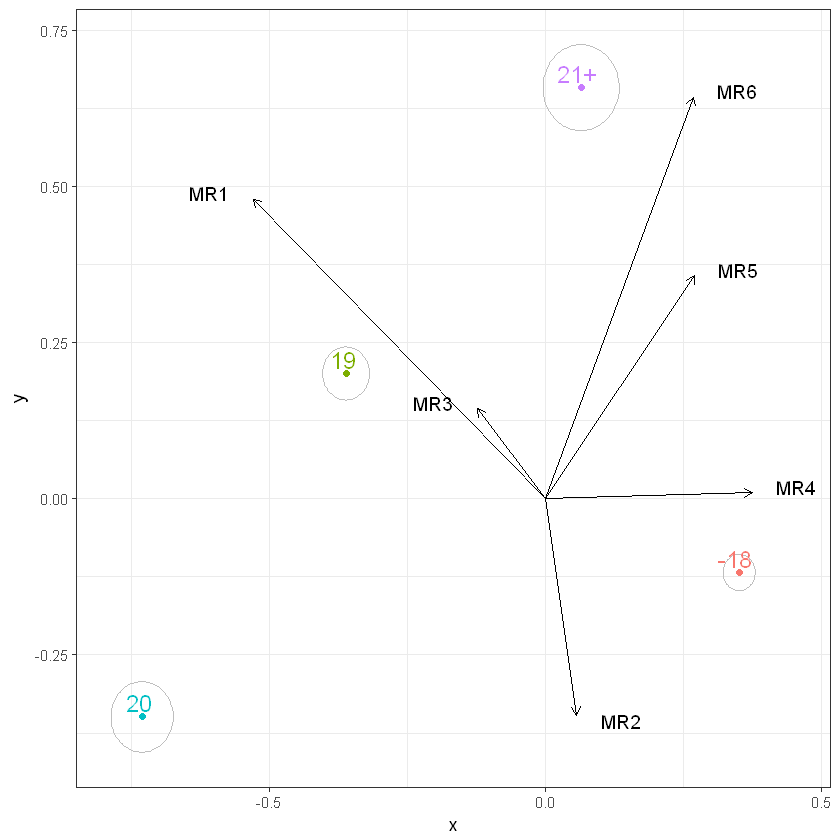

In [359]:
df <- data.frame(x=as.numeric(CoordGrupos[,1]), y=as.numeric(CoordGrupos[,2]), r=as.numeric(radio))

angle <- seq(-pi, pi, length = 100)

myplot <- ggplot()
for (i in 1:length(df$x)) {
        df_temp = data.frame(x = df$x[i] + df$r[i]*sin(angle), y = df$y[i] + df$r[i]*cos(angle))
        myplot = myplot + geom_polygon(data=df_temp, aes(x=x, y=y),color='grey', fill=NA,alpha=0.5, inherit.aes=F)
      }

myplot + geom_point(data=df, aes(x=x, y=y))+
geom_point(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,col=clase))+
geom_text(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,label=rownames(CoordGrupos),col=clase),hjust=0.6, vjust=-0.3,size=5)+
geom_segment(aes(x=0,y=0,xend=`Dim 1`,yend=`Dim 2`),data=CoordVar,arrow = arrow(length = unit(0.2,"cm"),type='open'),size=0.5,col='black')+
geom_text(aes(x=CoordVar$`Dim 1`+.08*sign(CoordVar$`Dim 1`),y=CoordVar$`Dim 2`+.01*sign(CoordVar$`Dim 2`),label=rownames(CoordVar)),data=CoordVar,size=4)+
theme_bw()+theme(legend.position="none")

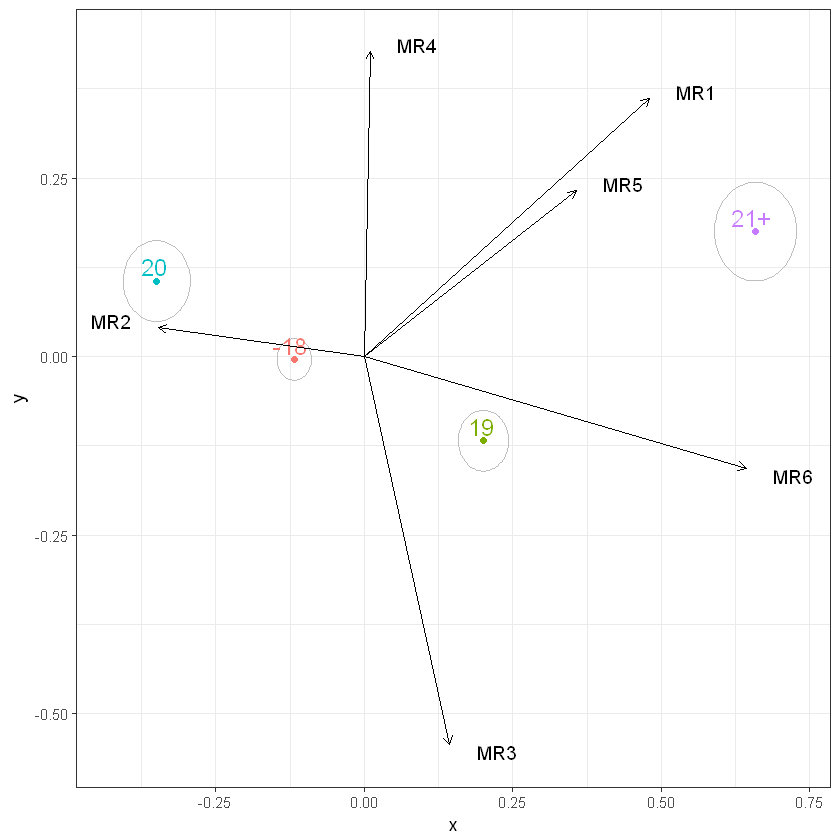

In [360]:
#stat_ellipse(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,level=radio),type='euclid')
df <- data.frame(x=as.numeric(CoordGrupos[,2]), y=as.numeric(CoordGrupos[,3]), r=as.numeric(radio))
angle <- seq(-pi, pi, length = 100)
myplot <- ggplot()
for (i in 1:length(df$x)) {
        df_temp = data.frame(x = df$x[i] + df$r[i]*sin(angle), y = df$y[i] + df$r[i]*cos(angle))
        myplot = myplot + geom_polygon(data=df_temp, aes(x=x, y=y),color='grey', fill=NA,alpha=0.5, inherit.aes=F)
      }

myplot + geom_point(data=df, aes(x=x, y=y))+
geom_point(data=CoordGrupos,aes(x=`Dim 2`,y=`Dim 3`,col=clase))+
geom_text(data=CoordGrupos,aes(x=`Dim 2`,y=`Dim 3`,label=rownames(CoordGrupos),col=clase),hjust=0.6, vjust=-0.3,size=5)+
geom_segment(aes(x=0,y=0,xend=`Dim 2`,yend=`Dim 3`),data=CoordVar,arrow = arrow(length = unit(0.2,"cm"),type='open'),size=0.5,col='black')+
geom_text(aes(x=CoordVar$`Dim 2`+.08*sign(CoordVar$`Dim 2`),y=CoordVar$`Dim 3`+.01*sign(CoordVar$`Dim 3`),label=rownames(CoordVar)),data=CoordVar,size=4)+
theme_bw()+theme(legend.position="none")

In [361]:
X <- Df_total_A1[!is.na(Df_total_A1$V_Studienrichtung),cbind("MR1","MR2","MR3","MR4","MR5","MR6")]
y <- as.factor(Df_total_A1[!is.na(Df_total_A1$V_Studienrichtung),]$V_Studienrichtung)

Totalcanbip <- CanonicalBiplot(X,y )

#Rescalar resultados
sca <- sum(Totalcanbip$GroupCoordinates^2)
scb <- sum(Totalcanbip$ColCoordinates^2)
sca <- sca/Totalcanbip$g
scb <- scb/Totalcanbip$p
scf <- sqrt(sqrt(scb/sca))

Totalcanbip$Group_Coord <- Totalcanbip$GroupCoordinates*scf
Totalcanbip$Variable_Coord <- Totalcanbip$ColCoordinates/scf
Totalcanbip$Individual_Coord <- Totalcanbip$RowCoordinates*scf
radio <- Totalcanbip$BonfRad

CoordGrupos <- as.data.frame(Totalcanbip$Group_Coord)
CoordVar <- as.data.frame(Totalcanbip$Variable_Coord)
CoordGrupos$clase <- c('Germ','Phil','Trad','Andere')
rownames(CoordGrupos) <- c('Germ','Phil','Trad','Andere')

In [362]:
Totalcanbip$ColContributions

,Dim 1,Dim 2,Dim 3
MR1,0.32246122,0.046896347,0.6306424
MR2,0.42751315,0.353818042,0.2186688
MR3,0.37711782,0.001517913,0.6213643
MR4,0.01288809,0.578673742,0.4084382
MR5,0.36129120,0.497957883,0.1407509
MR6,0.53987311,0.303016545,0.1571103


In [363]:
Totalcanbip$GroupContributions

,Dim 1,Dim 2,Dim 3
1,0.83594296,0.1629153,0.001141752
2,0.08150024,0.9162653,0.002234460
3,0.81814905,0.1372259,0.044625079
4,0.48973349,0.1628480,0.347418545


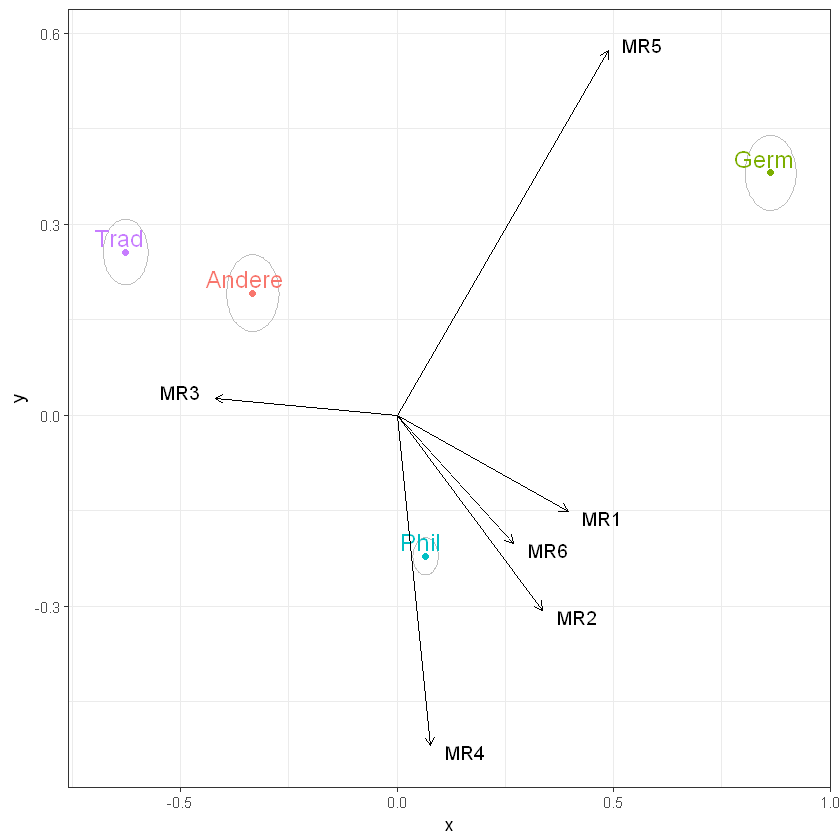

In [364]:
df <- data.frame(x=as.numeric(CoordGrupos[,1]), y=as.numeric(CoordGrupos[,2]), r=as.numeric(radio))

angle <- seq(-pi, pi, length = 100)

myplot <- ggplot()
for (i in 1:length(df$x)) {
        df_temp = data.frame(x = df$x[i] + df$r[i]*sin(angle), y = df$y[i] + df$r[i]*cos(angle))
        myplot = myplot + geom_polygon(data=df_temp, aes(x=x, y=y),color='grey', fill=NA,alpha=0.5, inherit.aes=F)
      }

myplot + geom_point(data=df, aes(x=x, y=y))+
geom_point(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,col=clase))+
geom_text(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,label=rownames(CoordGrupos),col=clase),hjust=0.6, vjust=-0.3,size=5)+
geom_segment(aes(x=0,y=0,xend=`Dim 1`,yend=`Dim 2`),data=CoordVar,arrow = arrow(length = unit(0.2,"cm"),type='open'),size=0.5,col='black')+
geom_text(aes(x=CoordVar$`Dim 1`+.08*sign(CoordVar$`Dim 1`),y=CoordVar$`Dim 2`+.01*sign(CoordVar$`Dim 2`),label=rownames(CoordVar)),data=CoordVar,size=4)+
theme_bw()+theme(legend.position="none")

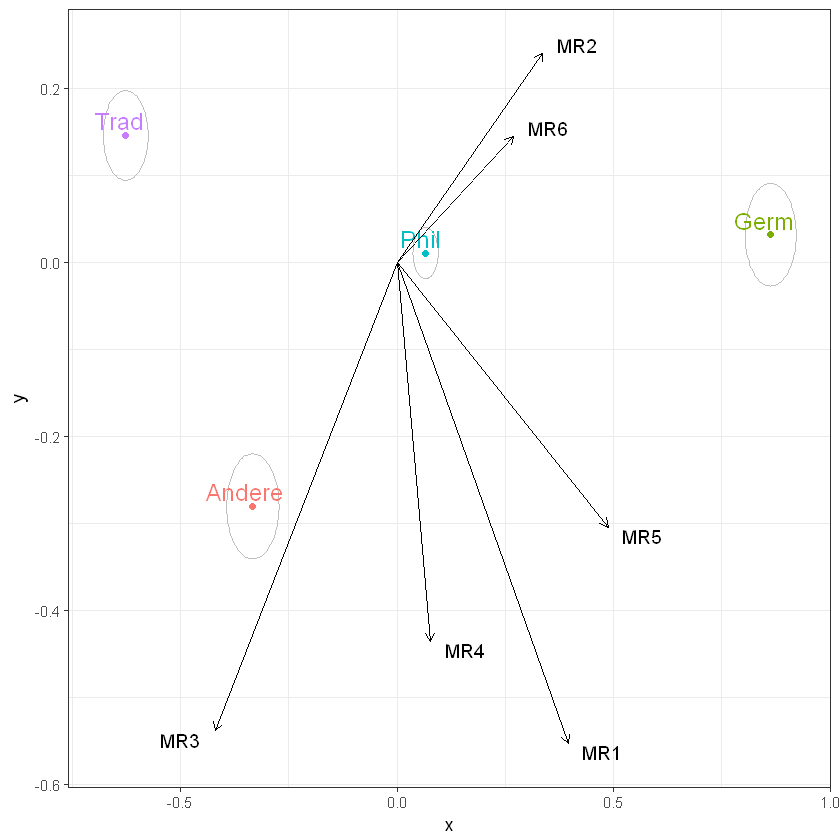

In [365]:
#stat_ellipse(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,level=radio),type='euclid')
df <- data.frame(x=as.numeric(CoordGrupos[,1]), y=as.numeric(CoordGrupos[,3]), r=as.numeric(radio))
angle <- seq(-pi, pi, length = 100)
myplot <- ggplot()
for (i in 1:length(df$x)) {
        df_temp = data.frame(x = df$x[i] + df$r[i]*sin(angle), y = df$y[i] + df$r[i]*cos(angle))
        myplot = myplot + geom_polygon(data=df_temp, aes(x=x, y=y),color='grey', fill=NA,alpha=0.5, inherit.aes=F)
      }

myplot + geom_point(data=df, aes(x=x, y=y))+
geom_point(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 3`,col=clase))+
geom_text(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 3`,label=rownames(CoordGrupos),col=clase),hjust=0.6, vjust=-0.3,size=5)+
geom_segment(aes(x=0,y=0,xend=`Dim 1`,yend=`Dim 3`),data=CoordVar,arrow = arrow(length = unit(0.2,"cm"),type='open'),size=0.5,col='black')+
geom_text(aes(x=CoordVar$`Dim 1`+.08*sign(CoordVar$`Dim 1`),y=CoordVar$`Dim 3`+.01*sign(CoordVar$`Dim 3`),label=rownames(CoordVar)),data=CoordVar,size=4)+
theme_bw()+theme(legend.position="none")

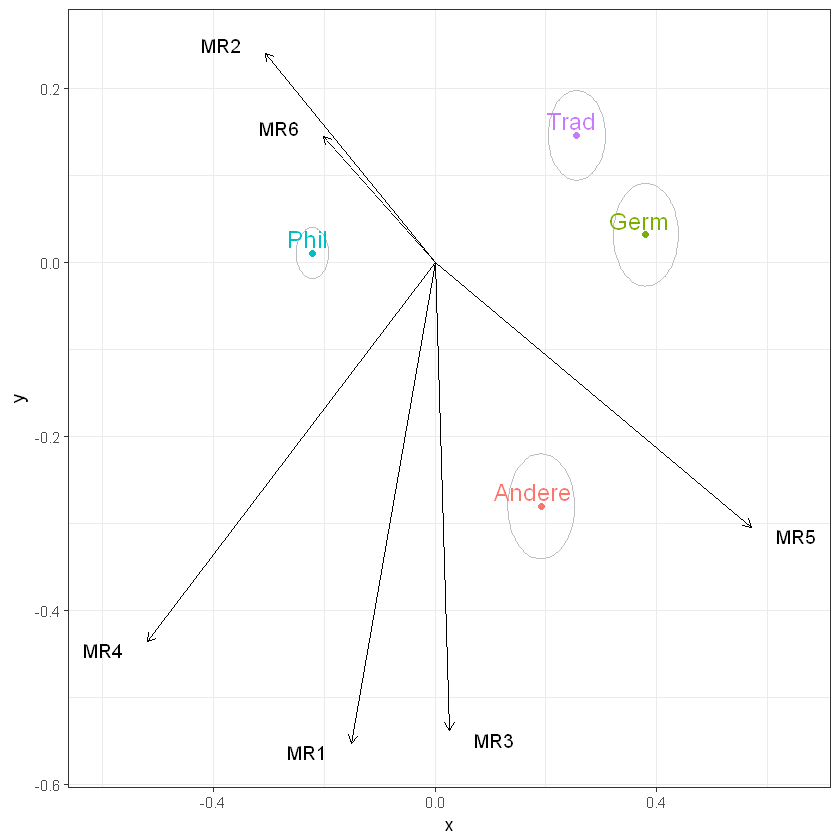

In [366]:
#stat_ellipse(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,level=radio),type='euclid')
df <- data.frame(x=as.numeric(CoordGrupos[,2]), y=as.numeric(CoordGrupos[,3]), r=as.numeric(radio))
angle <- seq(-pi, pi, length = 100)
myplot <- ggplot()
for (i in 1:length(df$x)) {
        df_temp = data.frame(x = df$x[i] + df$r[i]*sin(angle), y = df$y[i] + df$r[i]*cos(angle))
        myplot = myplot + geom_polygon(data=df_temp, aes(x=x, y=y),color='grey', fill=NA,alpha=0.5, inherit.aes=F)
      }

myplot + geom_point(data=df, aes(x=x, y=y))+
geom_point(data=CoordGrupos,aes(x=`Dim 2`,y=`Dim 3`,col=clase))+
geom_text(data=CoordGrupos,aes(x=`Dim 2`,y=`Dim 3`,label=rownames(CoordGrupos),col=clase),hjust=0.6, vjust=-0.3,size=5)+
geom_segment(aes(x=0,y=0,xend=`Dim 2`,yend=`Dim 3`),data=CoordVar,arrow = arrow(length = unit(0.2,"cm"),type='open'),size=0.5,col='black')+
geom_text(aes(x=CoordVar$`Dim 2`+.08*sign(CoordVar$`Dim 2`),y=CoordVar$`Dim 3`+.01*sign(CoordVar$`Dim 3`),label=rownames(CoordVar)),data=CoordVar,size=4)+
theme_bw()+theme(legend.position="none")